This is a Python Jupyter notebook that carries out the analysis of line profiles drawn across nuclei to calculate nucleoplasm:nuclear envelope intensity ratios.

To run the entire notebook, click on "Runtime", then choose "Run All". Alternatively, you can click each individual code segment to run it one at a time.

First set up the environment and load needed packages.

In [2]:
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import pandas as pd
import numpy as np
import os

Now we need to upload the CSV files to be anlyzed into the Colab environment.

In [3]:
from google.colab import files 
  
uploaded = files.upload()


Saving 210821_VariousHighTimeResolutionMovies_01_11_R3D_D3D_nucleus_1_substack_frame_1_middleslice_ROI_1_raw_profile.csv to 210821_VariousHighTimeResolutionMovies_01_11_R3D_D3D_nucleus_1_substack_frame_1_middleslice_ROI_1_raw_profile.csv
Saving 210821_VariousHighTimeResolutionMovies_01_11_R3D_D3D_nucleus_1_substack_frame_2_middleslice_ROI_1_raw_profile.csv to 210821_VariousHighTimeResolutionMovies_01_11_R3D_D3D_nucleus_1_substack_frame_2_middleslice_ROI_1_raw_profile.csv
Saving 210821_VariousHighTimeResolutionMovies_01_11_R3D_D3D_nucleus_1_substack_frame_3_middleslice_ROI_1_raw_profile.csv to 210821_VariousHighTimeResolutionMovies_01_11_R3D_D3D_nucleus_1_substack_frame_3_middleslice_ROI_1_raw_profile.csv
Saving 210821_VariousHighTimeResolutionMovies_01_11_R3D_D3D_nucleus_2_substack_frame_1_middleslice_ROI_1_raw_profile.csv to 210821_VariousHighTimeResolutionMovies_01_11_R3D_D3D_nucleus_2_substack_frame_1_middleslice_ROI_1_raw_profile.csv
Saving 210821_VariousHighTimeResolutionMovies_01

Next we define custom function for finding peaks and calculating NE/nucleoplasm ratio. A peak finder tool is used to find the X positions that correspond to the nuclear envelope in the plot profiles. The intensities of these two peaks are averaged to get a single "NE" intensity value. Then we get the nucleoplasmic intensity value by averaging the intensity vales for the middle 50% of the plot profile between the two peaks.

After this function runs, you will see a plot showing the original data, with "X's" on the two peaks identified as the NE peaks. This method has worked well for us so far, but you may get into issues where it is hard to correctly identify the two NE peaks if the data is very noisy or if the nucleoplasmic signal is equal to or greater than the NE signal. You can visually confirm that the correct peaks were called, and if you see that it isn't working on your data we can brainstorm other options.

In [4]:
def NucRatio(filename): 
    #read in csv from plot profiles, find peaks from NE and Nucleoplasm in middle,
    #extract peak intensity values and calculate Nuc/NE ratio. Save output to dataframe
    npc = pd.read_csv(filename)
    name = filename
    X = np.array(npc.X)
    Y = np.array(npc.Y)
    bg = min(Y).astype(int)
    Y = Y-bg
    peaks, _ = find_peaks(Y, distance=2, prominence=75)
    print('Number of Peaks:', len(peaks))
    print(peaks)
    if len(peaks) != 2:
      plt.plot(Y)
      plt.plot(peaks, Y[peaks], "x")
      plt.title(name)
      plt.show()
      ne1=int(input("Choose NE1 Peak X position"))
      ne2=int(input("Choose NE2 Peak X position"))
      nes = np.array([ne1, ne2])
      print('NEs:', nes)
      peakRange = ne2-ne1
      print("Peak Dist.:", peakRange)
      peakMid = ((ne1+ne2)//2)
      print("Nuc Mid: ", peakMid)
      nucStart = int(ne1+(0.25*peakRange))
      nucEnd = int(ne2-(0.25*peakRange))
      print("NucStart: ", nucStart, "NucEnd: ", nucEnd)
      nucpoint = Y[peakMid]
      print("NucInt Point: ", nucpoint)
      nuc = np.mean(Y[nucStart:nucEnd])
      print("NucInt padded: ", nuc)
      ne1int = Y[ne1]
      ne2int = Y[ne2]
      nucRatio = nuc/((ne1int+ne2int)/2)
      output = [name,ne1int, ne2int, nuc, nucRatio]
      plt.plot(Y)
      plt.plot(peaks, Y[peaks], "x")
      plt.title(name)
      plt.show()
      return(output)
    else:
      ne1 = min(peaks)
      ne2 = max(peaks)
      nes = np.array([ne1, ne2])
      print('NEs:', nes)
      peakRange = ne2-ne1
      print("Peak Dist.:", peakRange)
      peakMid = ((ne1+ne2)//2)
      print("Nuc Mid: ", peakMid)
      nucStart = ne1+(0.25*peakRange).astype(int)
      nucEnd = ne2-(0.25*peakRange).astype(int)
      print("NucStart: ", nucStart, "NucEnd: ", nucEnd)
      nucpoint = Y[peakMid]
      print("NucInt Point: ", nucpoint)
      nuc = np.mean(Y[nucStart:nucEnd]).astype(int)
      print("NucInt padded: ", nuc)
      ne1int = Y[ne1]
      ne2int = Y[ne2]
      nucRatio = nuc/((ne1int+ne2int)/2)
      output = [name,ne1int, ne2int, nuc, nucRatio]
      plt.plot(Y)
      plt.plot(peaks, Y[peaks], "x")
      plt.title(name)
      plt.show()
      return(output)

Next, we can apply this function to one csv to see how it works.



You have uploaded 162 files.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: Second argument 'Y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  if __name__ == '__main__':


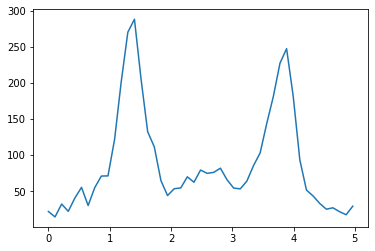

In [5]:
data = list(uploaded)

print("You have uploaded", len(data), "files.")

check=pd.read_csv(data[0])
check.head()
type(check)

plt.plot("X", "Y", data=check)




Now we can apply this to all CSV files uploaded to the directory in batch.


Number of Peaks: 2
[13 36]
NEs: [13 36]
Peak Dist.: 23
Nuc Mid:  24
NucStart:  18 NucEnd:  31
NucInt Point:  60.468
NucInt padded:  49


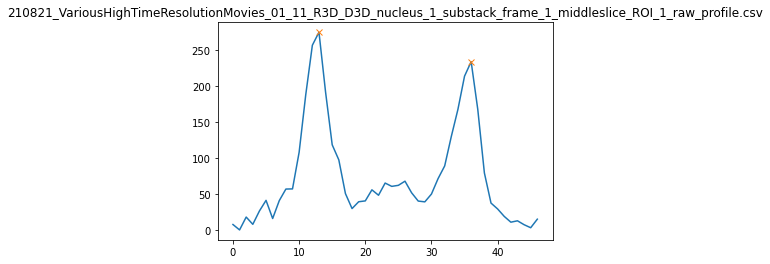

Number of Peaks: 2
[15 31]
NEs: [15 31]
Peak Dist.: 16
Nuc Mid:  23
NucStart:  19 NucEnd:  27
NucInt Point:  56.78
NucInt padded:  65


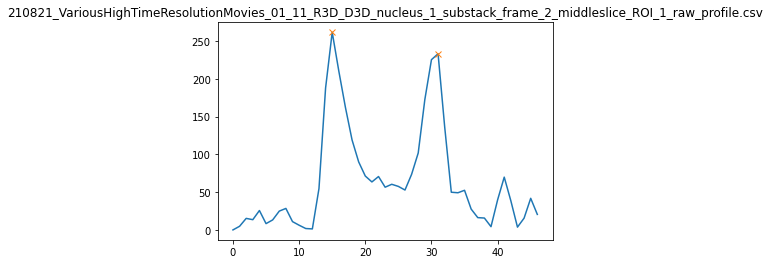

Number of Peaks: 2
[14 29]
NEs: [14 29]
Peak Dist.: 15
Nuc Mid:  21
NucStart:  17 NucEnd:  26
NucInt Point:  73.65
NucInt padded:  60


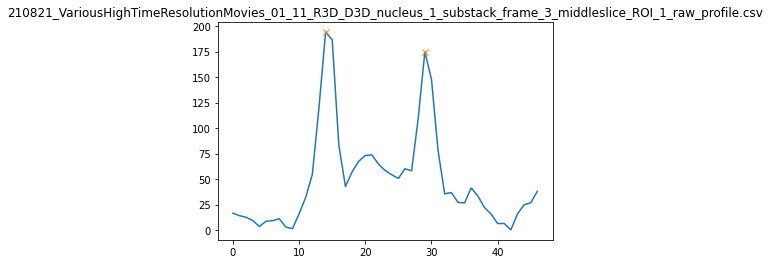

Number of Peaks: 2
[11 31]
NEs: [11 31]
Peak Dist.: 20
Nuc Mid:  21
NucStart:  16 NucEnd:  26
NucInt Point:  87.652
NucInt padded:  64


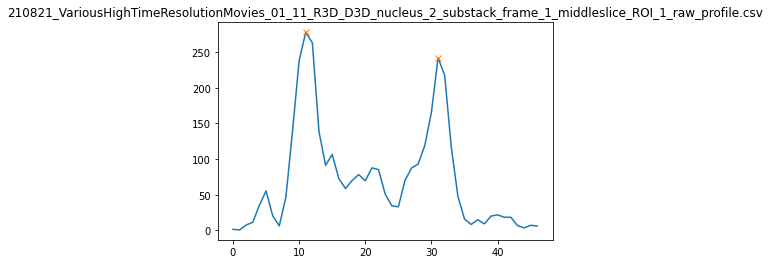

Number of Peaks: 2
[15 31]
NEs: [15 31]
Peak Dist.: 16
Nuc Mid:  23
NucStart:  19 NucEnd:  27
NucInt Point:  46.248
NucInt padded:  31


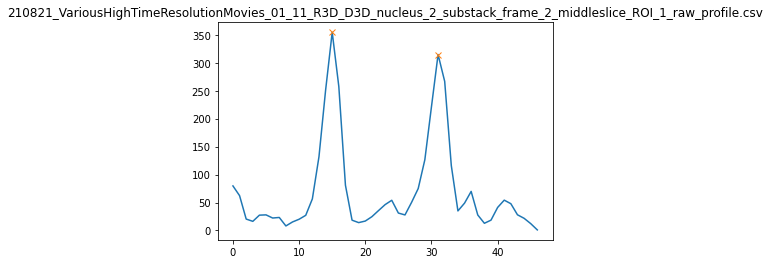

Number of Peaks: 2
[16 31]
NEs: [16 31]
Peak Dist.: 15
Nuc Mid:  23
NucStart:  19 NucEnd:  28
NucInt Point:  68.32
NucInt padded:  49


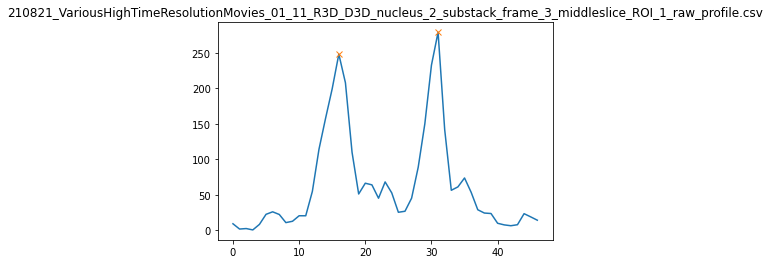

Number of Peaks: 2
[15 32]
NEs: [15 32]
Peak Dist.: 17
Nuc Mid:  23
NucStart:  19 NucEnd:  28
NucInt Point:  58.974
NucInt padded:  76


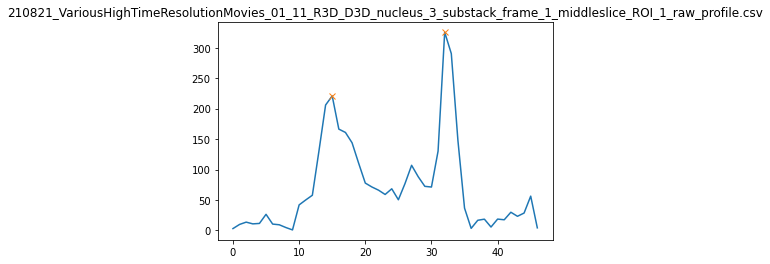

Number of Peaks: 2
[16 31]
NEs: [16 31]
Peak Dist.: 15
Nuc Mid:  23
NucStart:  19 NucEnd:  28
NucInt Point:  62.840999999999994
NucInt padded:  71


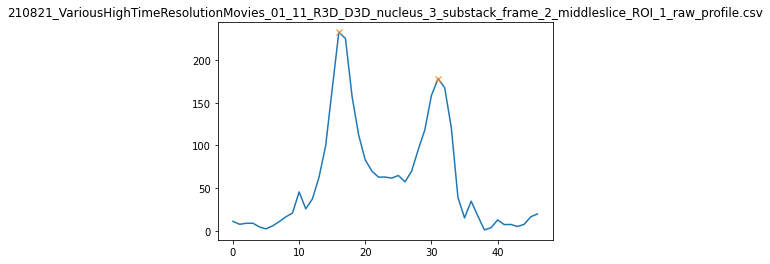

Number of Peaks: 2
[14 31]
NEs: [14 31]
Peak Dist.: 17
Nuc Mid:  22
NucStart:  18 NucEnd:  27
NucInt Point:  53.026
NucInt padded:  62


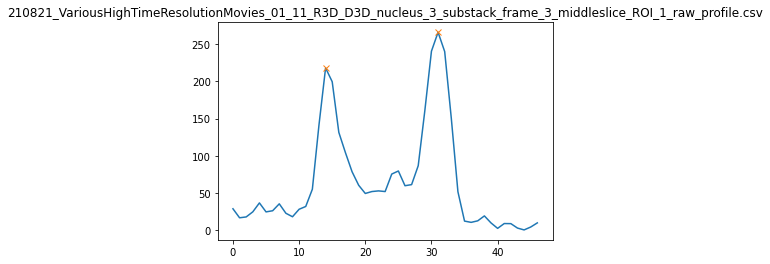

Number of Peaks: 2
[13 35]
NEs: [13 35]
Peak Dist.: 22
Nuc Mid:  24
NucStart:  18 NucEnd:  30
NucInt Point:  50.321
NucInt padded:  73


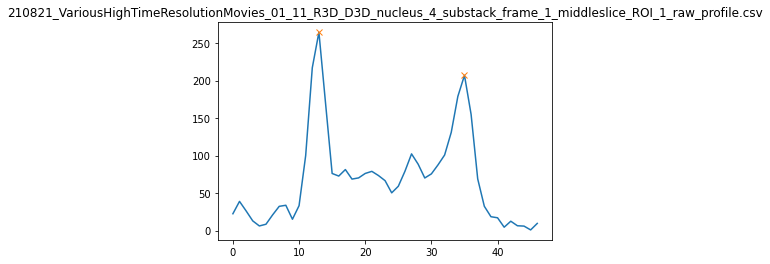

Number of Peaks: 2
[15 31]
NEs: [15 31]
Peak Dist.: 16
Nuc Mid:  23
NucStart:  19 NucEnd:  27
NucInt Point:  49.265
NucInt padded:  76


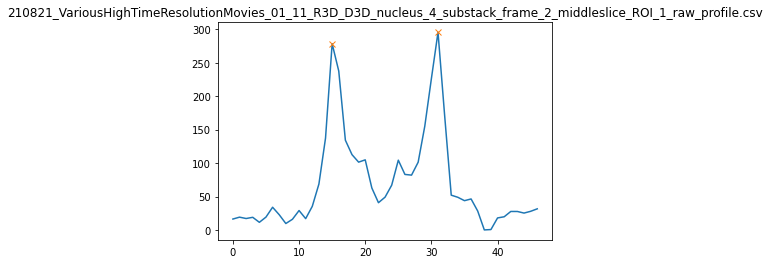

Number of Peaks: 2
[15 33]
NEs: [15 33]
Peak Dist.: 18
Nuc Mid:  24
NucStart:  19 NucEnd:  29
NucInt Point:  85.799
NucInt padded:  93


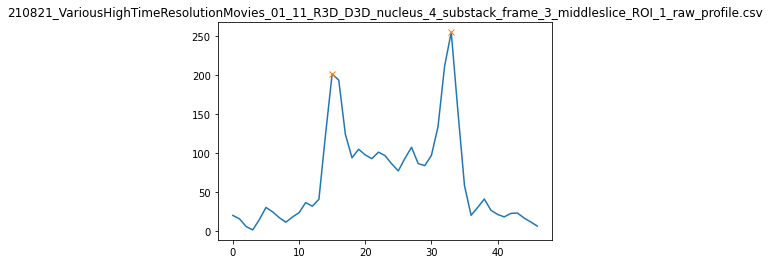

Number of Peaks: 2
[11 34]
NEs: [11 34]
Peak Dist.: 23
Nuc Mid:  22
NucStart:  16 NucEnd:  29
NucInt Point:  50.489
NucInt padded:  65


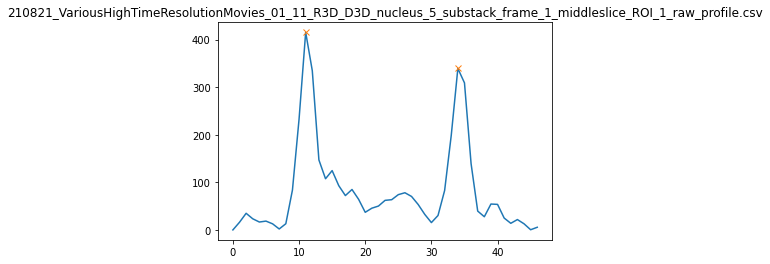

Number of Peaks: 2
[14 31]
NEs: [14 31]
Peak Dist.: 17
Nuc Mid:  22
NucStart:  18 NucEnd:  27
NucInt Point:  84.956
NucInt padded:  67


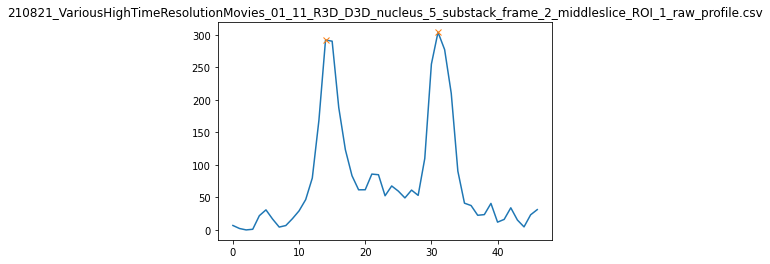

Number of Peaks: 2
[12 32]
NEs: [12 32]
Peak Dist.: 20
Nuc Mid:  22
NucStart:  17 NucEnd:  27
NucInt Point:  45.186
NucInt padded:  51


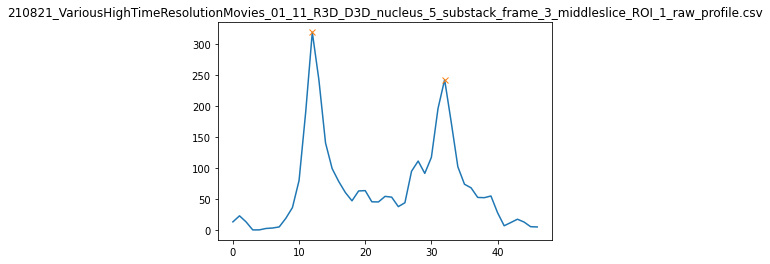

Number of Peaks: 2
[13 34]
NEs: [13 34]
Peak Dist.: 21
Nuc Mid:  23
NucStart:  18 NucEnd:  29
NucInt Point:  32.832
NucInt padded:  48


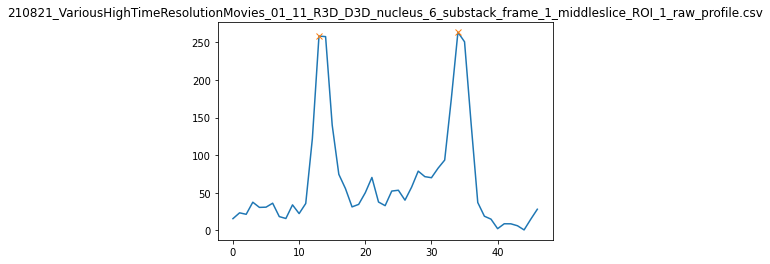

Number of Peaks: 2
[16 30]
NEs: [16 30]
Peak Dist.: 14
Nuc Mid:  23
NucStart:  19 NucEnd:  27
NucInt Point:  58.925
NucInt padded:  72


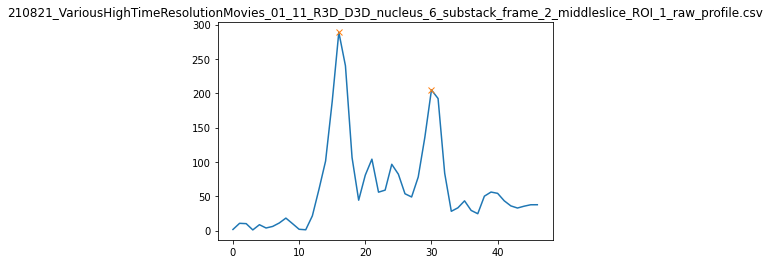

Number of Peaks: 2
[16 32]
NEs: [16 32]
Peak Dist.: 16
Nuc Mid:  24
NucStart:  20 NucEnd:  28
NucInt Point:  77.761
NucInt padded:  84


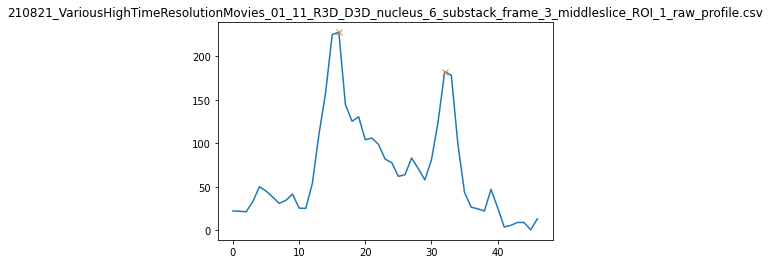

Number of Peaks: 2
[12 36]
NEs: [12 36]
Peak Dist.: 24
Nuc Mid:  24
NucStart:  18 NucEnd:  30
NucInt Point:  22.398000000000003
NucInt padded:  43


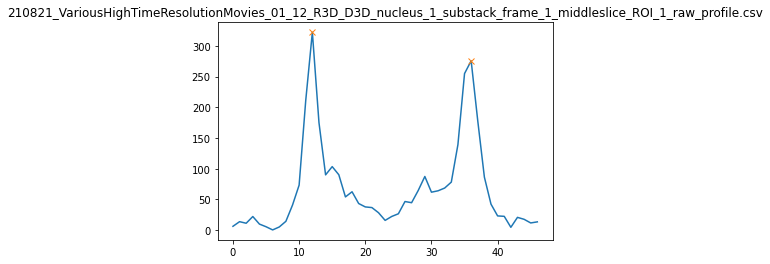

Number of Peaks: 2
[15 31]
NEs: [15 31]
Peak Dist.: 16
Nuc Mid:  23
NucStart:  19 NucEnd:  27
NucInt Point:  37.85
NucInt padded:  53


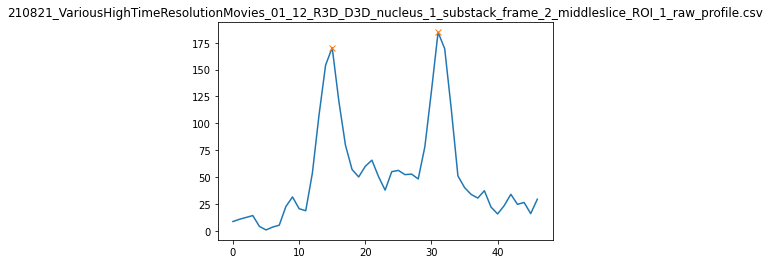

Number of Peaks: 2
[15 36]
NEs: [15 36]
Peak Dist.: 21
Nuc Mid:  25
NucStart:  20 NucEnd:  31
NucInt Point:  65.622
NucInt padded:  60


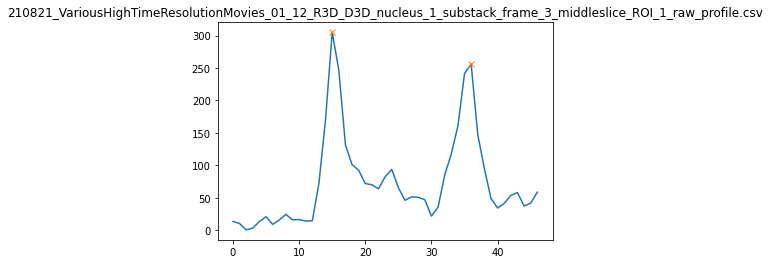

Number of Peaks: 2
[12 35]
NEs: [12 35]
Peak Dist.: 23
Nuc Mid:  23
NucStart:  17 NucEnd:  30
NucInt Point:  21.988
NucInt padded:  29


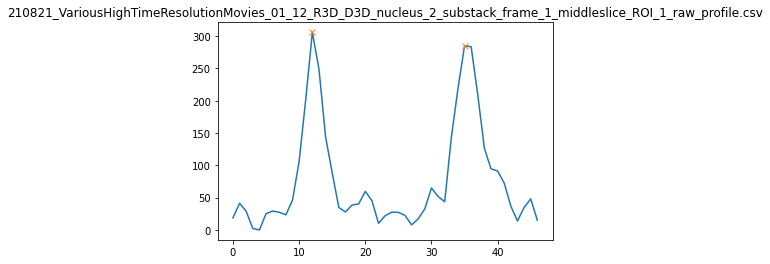

Number of Peaks: 2
[15 31]
NEs: [15 31]
Peak Dist.: 16
Nuc Mid:  23
NucStart:  19 NucEnd:  27
NucInt Point:  70.755
NucInt padded:  46


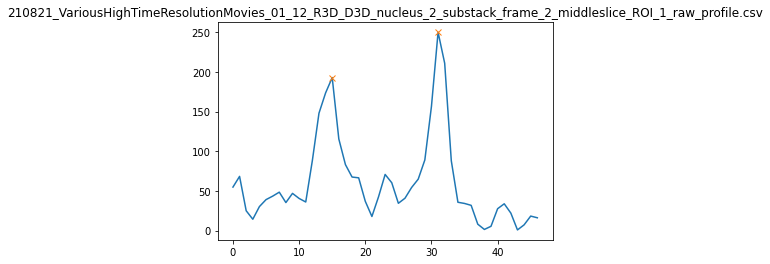

Number of Peaks: 2
[13 32]
NEs: [13 32]
Peak Dist.: 19
Nuc Mid:  22
NucStart:  17 NucEnd:  28
NucInt Point:  40.215
NucInt padded:  39


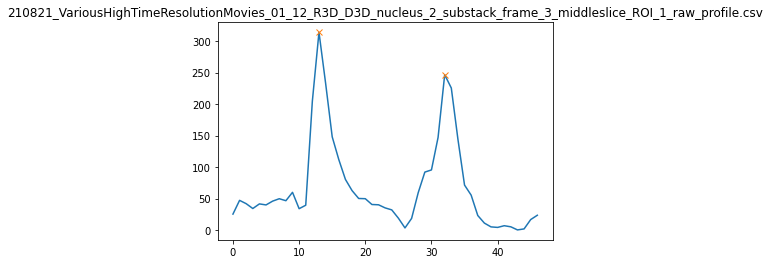

Number of Peaks: 2
[13 34]
NEs: [13 34]
Peak Dist.: 21
Nuc Mid:  23
NucStart:  18 NucEnd:  29
NucInt Point:  28.732
NucInt padded:  32


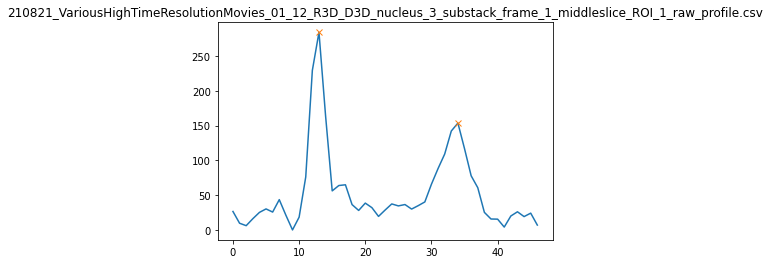

Number of Peaks: 2
[13 30]
NEs: [13 30]
Peak Dist.: 17
Nuc Mid:  21
NucStart:  17 NucEnd:  26
NucInt Point:  78.392
NucInt padded:  53


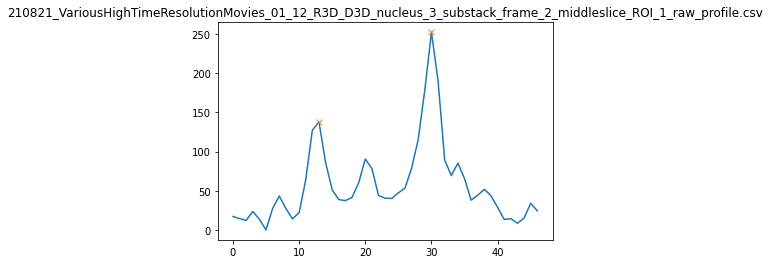

Number of Peaks: 2
[13 31]
NEs: [13 31]
Peak Dist.: 18
Nuc Mid:  22
NucStart:  17 NucEnd:  27
NucInt Point:  70.466
NucInt padded:  64


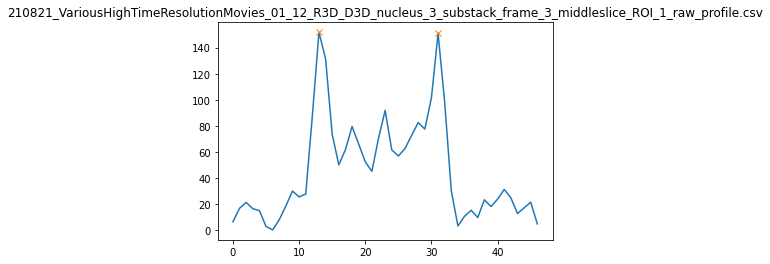

Number of Peaks: 2
[11 35]
NEs: [11 35]
Peak Dist.: 24
Nuc Mid:  23
NucStart:  17 NucEnd:  29
NucInt Point:  36.803
NucInt padded:  52


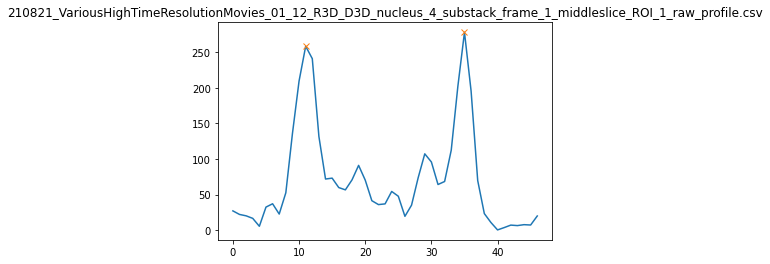

Number of Peaks: 2
[15 32]
NEs: [15 32]
Peak Dist.: 17
Nuc Mid:  23
NucStart:  19 NucEnd:  28
NucInt Point:  68.255
NucInt padded:  90


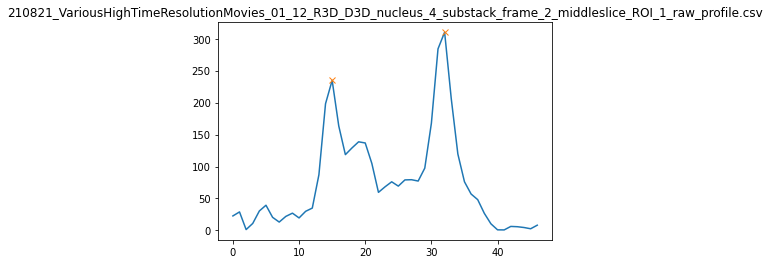

Number of Peaks: 2
[14 33]
NEs: [14 33]
Peak Dist.: 19
Nuc Mid:  23
NucStart:  18 NucEnd:  29
NucInt Point:  103.053
NucInt padded:  106


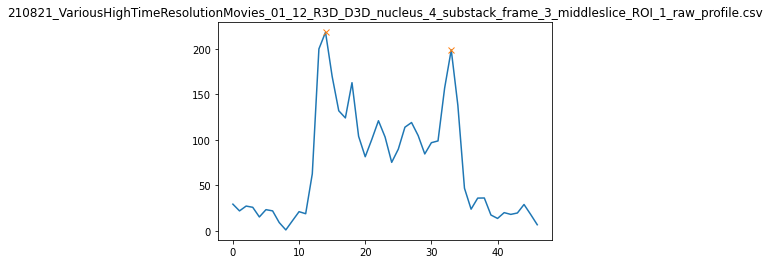

Number of Peaks: 2
[11 34]
NEs: [11 34]
Peak Dist.: 23
Nuc Mid:  22
NucStart:  16 NucEnd:  29
NucInt Point:  32.898
NucInt padded:  70


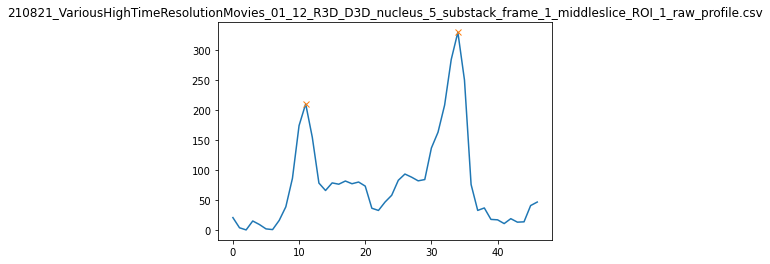

Number of Peaks: 2
[15 30]
NEs: [15 30]
Peak Dist.: 15
Nuc Mid:  22
NucStart:  18 NucEnd:  27
NucInt Point:  62.949
NucInt padded:  57


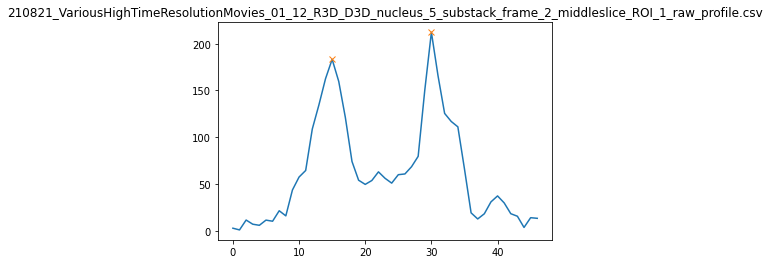

Number of Peaks: 2
[15 29]
NEs: [15 29]
Peak Dist.: 14
Nuc Mid:  22
NucStart:  18 NucEnd:  26
NucInt Point:  106.347
NucInt padded:  52


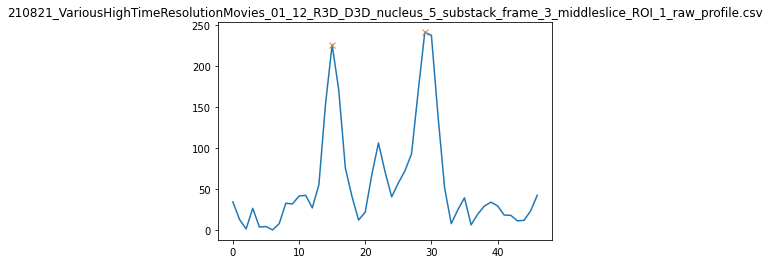

Number of Peaks: 2
[14 32]
NEs: [14 32]
Peak Dist.: 18
Nuc Mid:  23
NucStart:  18 NucEnd:  28
NucInt Point:  68.278
NucInt padded:  40


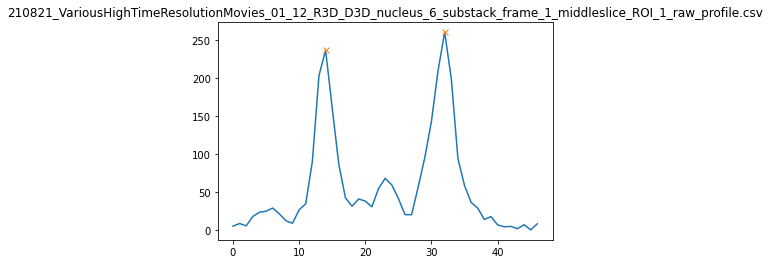

Number of Peaks: 2
[16 32]
NEs: [16 32]
Peak Dist.: 16
Nuc Mid:  24
NucStart:  20 NucEnd:  28
NucInt Point:  27.569000000000003
NucInt padded:  40


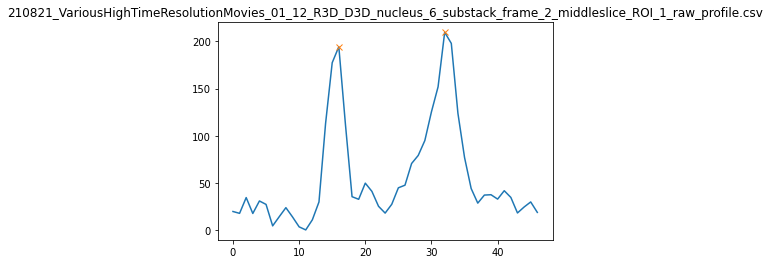

Number of Peaks: 2
[12 35]
NEs: [12 35]
Peak Dist.: 23
Nuc Mid:  23
NucStart:  17 NucEnd:  30
NucInt Point:  69.648
NucInt padded:  51


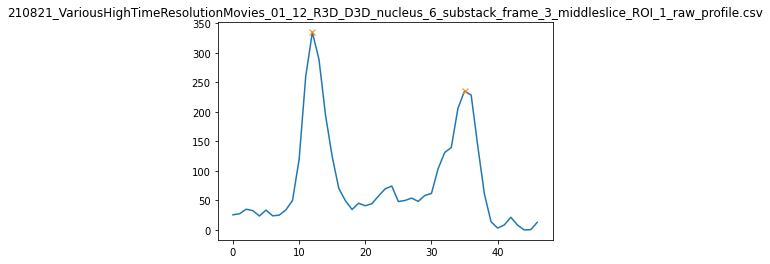

Number of Peaks: 2
[10 33]
NEs: [10 33]
Peak Dist.: 23
Nuc Mid:  21
NucStart:  15 NucEnd:  28
NucInt Point:  70.071
NucInt padded:  56


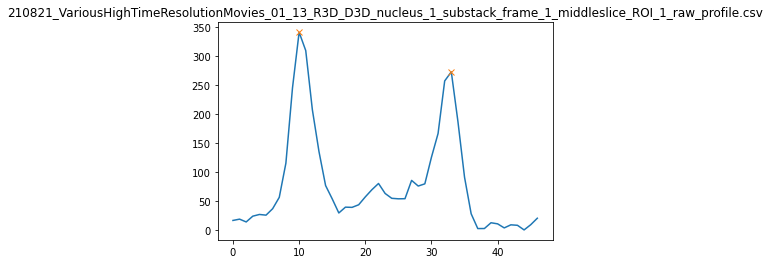

Number of Peaks: 2
[14 30]
NEs: [14 30]
Peak Dist.: 16
Nuc Mid:  22
NucStart:  18 NucEnd:  26
NucInt Point:  70.557
NucInt padded:  93


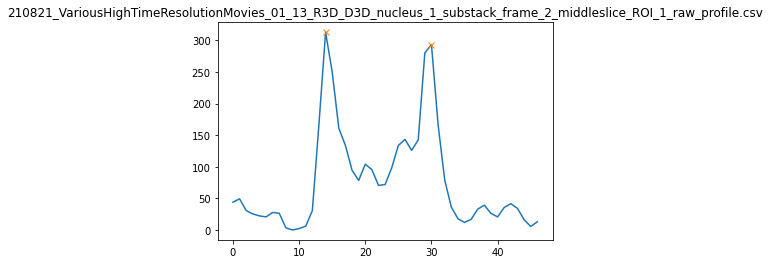

Number of Peaks: 2
[15 31]
NEs: [15 31]
Peak Dist.: 16
Nuc Mid:  23
NucStart:  19 NucEnd:  27
NucInt Point:  79.779
NucInt padded:  94


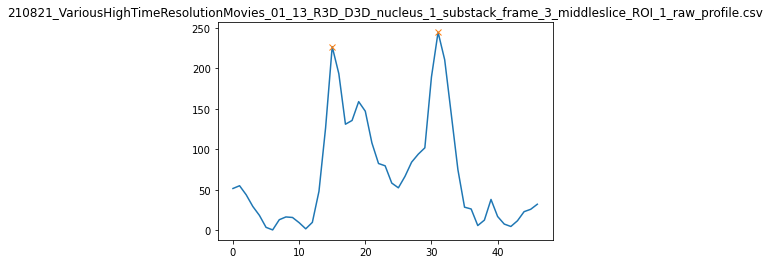

Number of Peaks: 2
[13 33]
NEs: [13 33]
Peak Dist.: 20
Nuc Mid:  23
NucStart:  18 NucEnd:  28
NucInt Point:  42.826
NucInt padded:  45


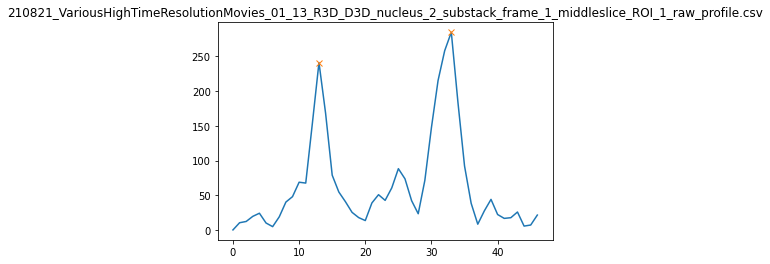

Number of Peaks: 2
[14 30]
NEs: [14 30]
Peak Dist.: 16
Nuc Mid:  22
NucStart:  18 NucEnd:  26
NucInt Point:  39.456
NucInt padded:  54


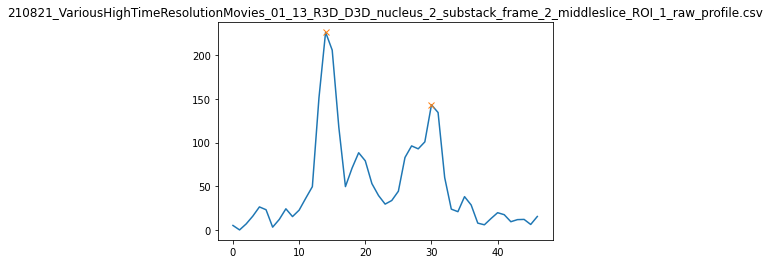

Number of Peaks: 2
[14 31]
NEs: [14 31]
Peak Dist.: 17
Nuc Mid:  22
NucStart:  18 NucEnd:  27
NucInt Point:  41.094
NucInt padded:  45


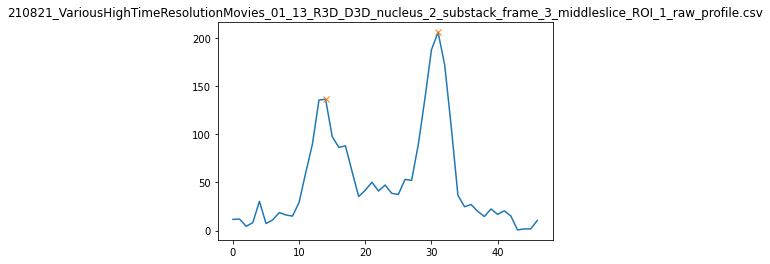

Number of Peaks: 2
[11 33]
NEs: [11 33]
Peak Dist.: 22
Nuc Mid:  22
NucStart:  16 NucEnd:  28
NucInt Point:  53.808
NucInt padded:  68


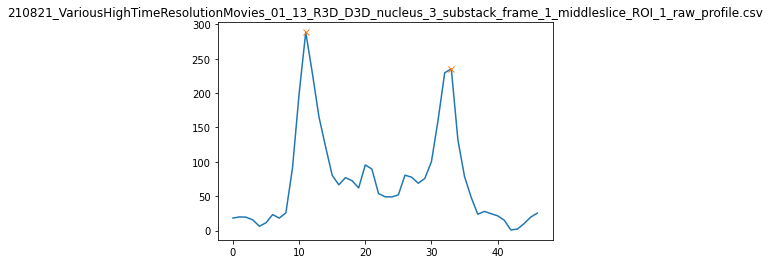

Number of Peaks: 2
[16 31]
NEs: [16 31]
Peak Dist.: 15
Nuc Mid:  23
NucStart:  19 NucEnd:  28
NucInt Point:  34.857
NucInt padded:  35


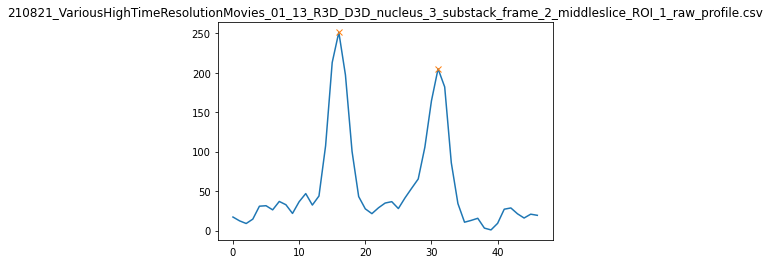

Number of Peaks: 2
[13 32]
NEs: [13 32]
Peak Dist.: 19
Nuc Mid:  22
NucStart:  17 NucEnd:  28
NucInt Point:  52.831
NucInt padded:  49


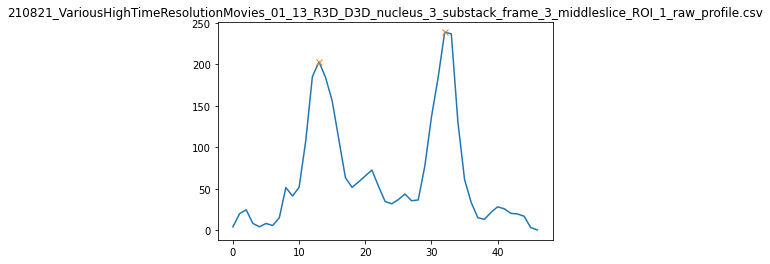

Number of Peaks: 2
[11 33]
NEs: [11 33]
Peak Dist.: 22
Nuc Mid:  22
NucStart:  16 NucEnd:  28
NucInt Point:  80.738
NucInt padded:  77


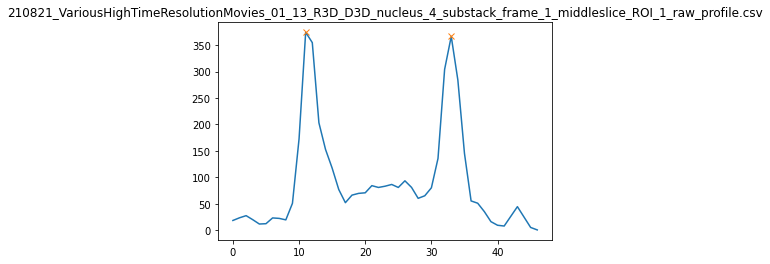

Number of Peaks: 2
[17 30]
NEs: [17 30]
Peak Dist.: 13
Nuc Mid:  23
NucStart:  20 NucEnd:  27
NucInt Point:  58.854
NucInt padded:  74


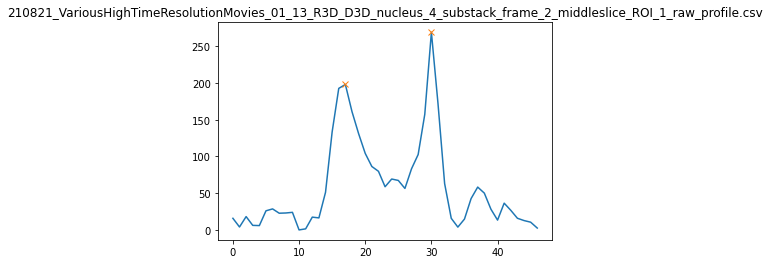

Number of Peaks: 2
[17 30]
NEs: [17 30]
Peak Dist.: 13
Nuc Mid:  23
NucStart:  20 NucEnd:  27
NucInt Point:  71.39
NucInt padded:  77


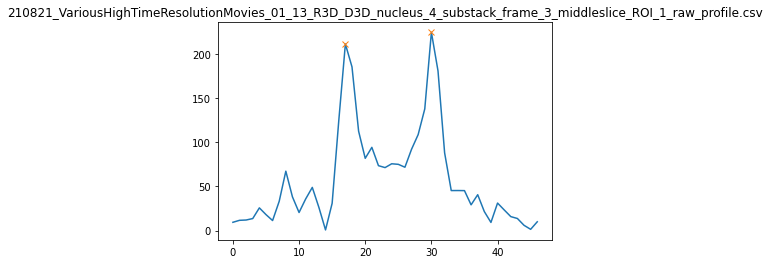

Number of Peaks: 2
[ 9 35]
NEs: [ 9 35]
Peak Dist.: 26
Nuc Mid:  22
NucStart:  15 NucEnd:  29
NucInt Point:  28.371000000000002
NucInt padded:  36


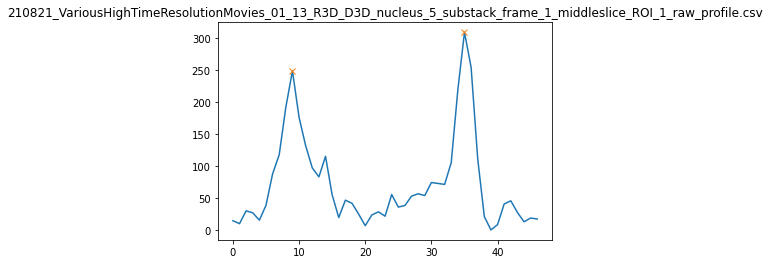

Number of Peaks: 2
[15 33]
NEs: [15 33]
Peak Dist.: 18
Nuc Mid:  24
NucStart:  19 NucEnd:  29
NucInt Point:  72.741
NucInt padded:  68


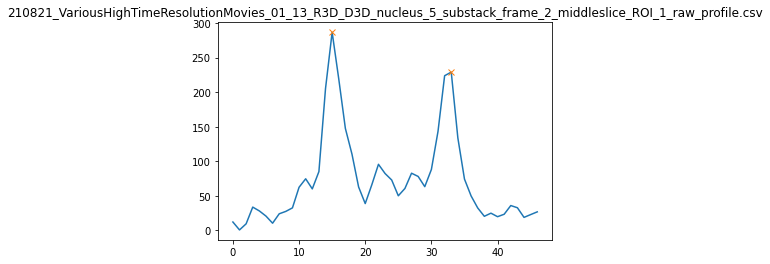

Number of Peaks: 2
[15 33]
NEs: [15 33]
Peak Dist.: 18
Nuc Mid:  24
NucStart:  19 NucEnd:  29
NucInt Point:  49.727
NucInt padded:  54


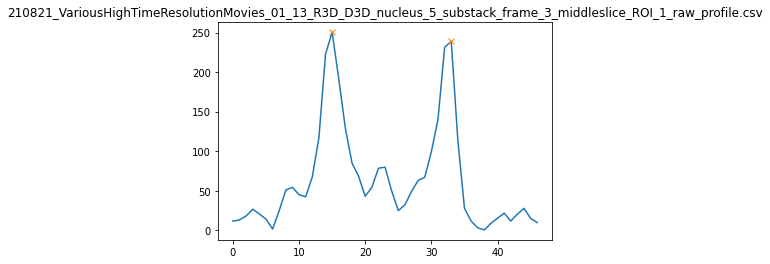

Number of Peaks: 2
[13 34]
NEs: [13 34]
Peak Dist.: 21
Nuc Mid:  23
NucStart:  18 NucEnd:  29
NucInt Point:  46.403
NucInt padded:  60


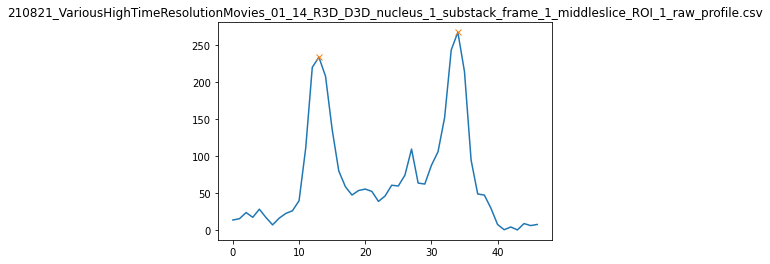

Number of Peaks: 2
[16 31]
NEs: [16 31]
Peak Dist.: 15
Nuc Mid:  23
NucStart:  19 NucEnd:  28
NucInt Point:  57.69499999999999
NucInt padded:  62


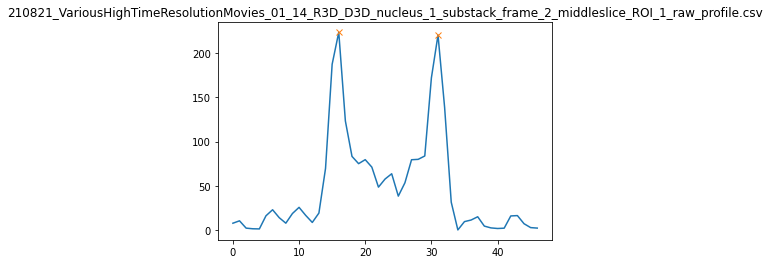

Number of Peaks: 2
[15 31]
NEs: [15 31]
Peak Dist.: 16
Nuc Mid:  23
NucStart:  19 NucEnd:  27
NucInt Point:  66.386
NucInt padded:  72


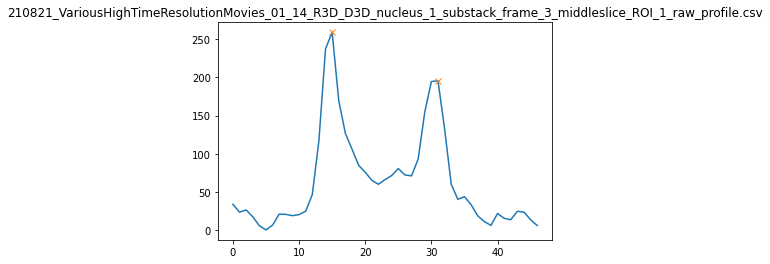

Number of Peaks: 2
[12 33]
NEs: [12 33]
Peak Dist.: 21
Nuc Mid:  22
NucStart:  17 NucEnd:  28
NucInt Point:  70.969
NucInt padded:  65


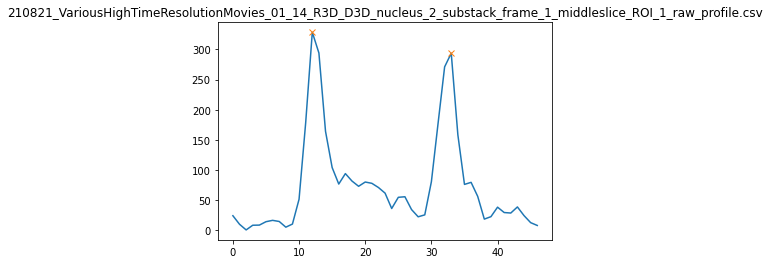

Number of Peaks: 2
[15 30]
NEs: [15 30]
Peak Dist.: 15
Nuc Mid:  22
NucStart:  18 NucEnd:  27
NucInt Point:  79.68
NucInt padded:  71


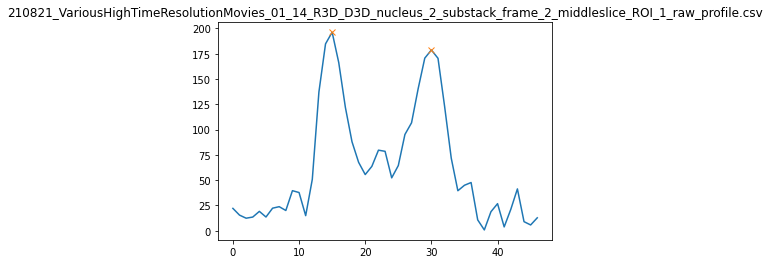

Number of Peaks: 2
[16 30]
NEs: [16 30]
Peak Dist.: 14
Nuc Mid:  23
NucStart:  19 NucEnd:  27
NucInt Point:  37.584
NucInt padded:  72


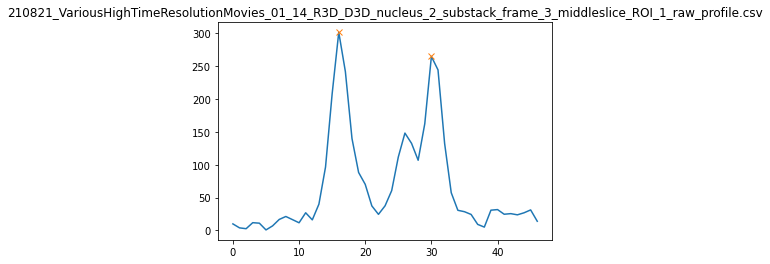

Number of Peaks: 2
[15 31]
NEs: [15 31]
Peak Dist.: 16
Nuc Mid:  23
NucStart:  19 NucEnd:  27
NucInt Point:  58.185
NucInt padded:  53


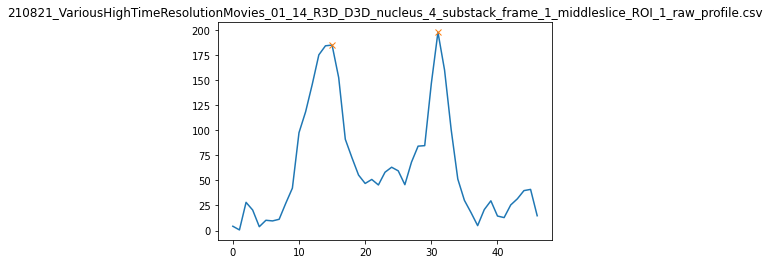

Number of Peaks: 2
[15 29]
NEs: [15 29]
Peak Dist.: 14
Nuc Mid:  22
NucStart:  18 NucEnd:  26
NucInt Point:  58.994
NucInt padded:  86


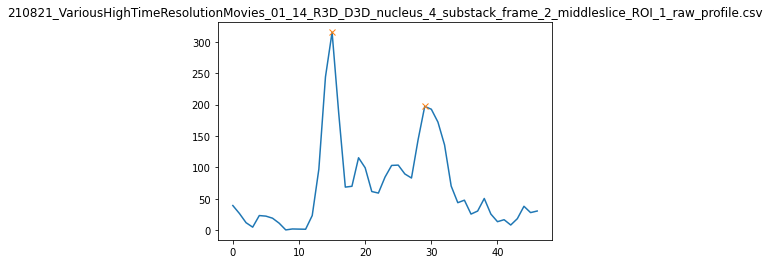

Number of Peaks: 3
[14 23 34]


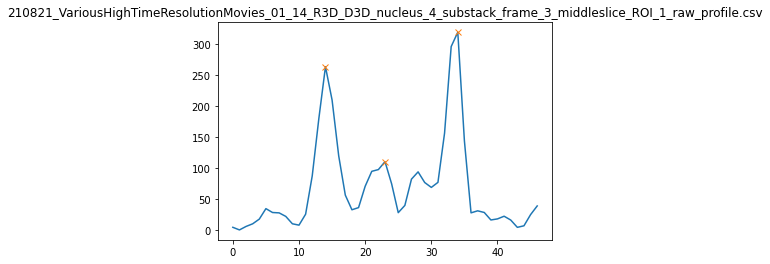

Choose NE1 Peak X position14
Choose NE2 Peak X position34
NEs: [14 34]
Peak Dist.: 20
Nuc Mid:  24
NucStart:  19 NucEnd:  29
NucInt Point:  74.61
NucInt padded:  72.8159


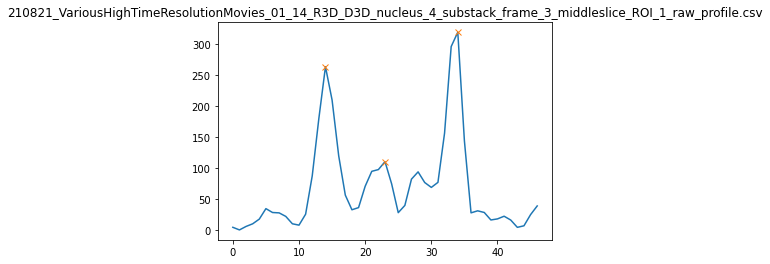

Number of Peaks: 2
[11 35]
NEs: [11 35]
Peak Dist.: 24
Nuc Mid:  23
NucStart:  17 NucEnd:  29
NucInt Point:  42.658
NucInt padded:  49


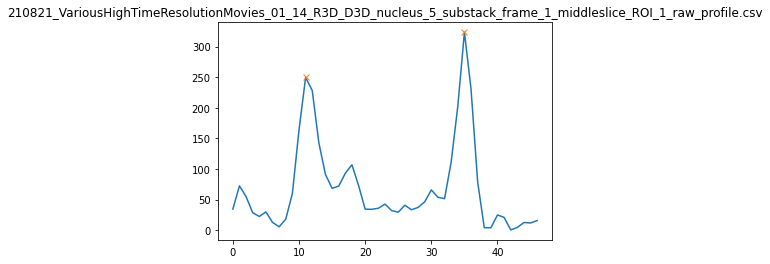

Number of Peaks: 2
[14 29]
NEs: [14 29]
Peak Dist.: 15
Nuc Mid:  21
NucStart:  17 NucEnd:  26
NucInt Point:  63.357
NucInt padded:  82


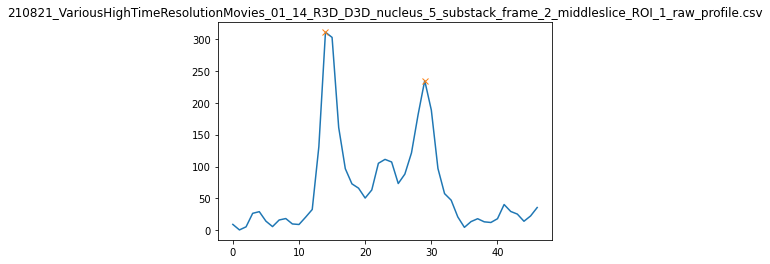

Number of Peaks: 2
[14 31]
NEs: [14 31]
Peak Dist.: 17
Nuc Mid:  22
NucStart:  18 NucEnd:  27
NucInt Point:  73.615
NucInt padded:  81


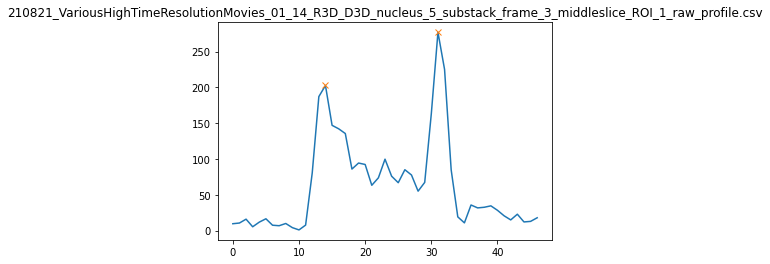

Number of Peaks: 2
[10 34]
NEs: [10 34]
Peak Dist.: 24
Nuc Mid:  22
NucStart:  16 NucEnd:  28
NucInt Point:  60.491
NucInt padded:  53


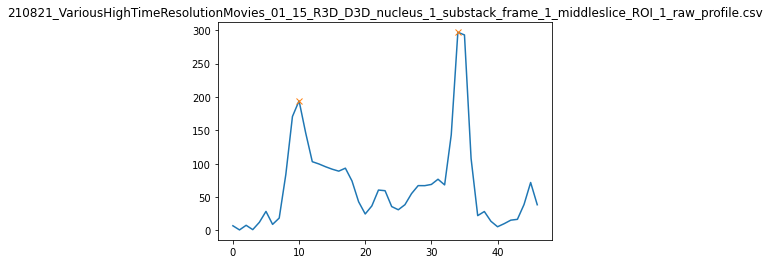

Number of Peaks: 2
[14 29]
NEs: [14 29]
Peak Dist.: 15
Nuc Mid:  21
NucStart:  17 NucEnd:  26
NucInt Point:  41.273
NucInt padded:  51


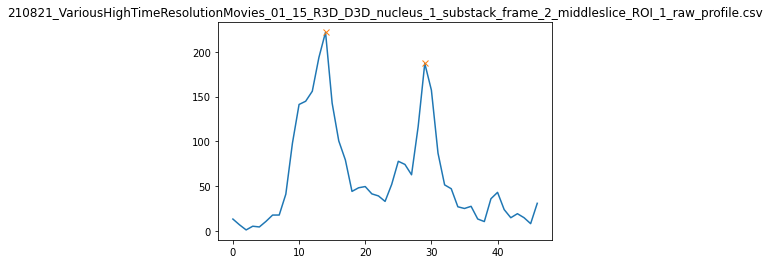

Number of Peaks: 2
[16 31]
NEs: [16 31]
Peak Dist.: 15
Nuc Mid:  23
NucStart:  19 NucEnd:  28
NucInt Point:  95.196
NucInt padded:  84


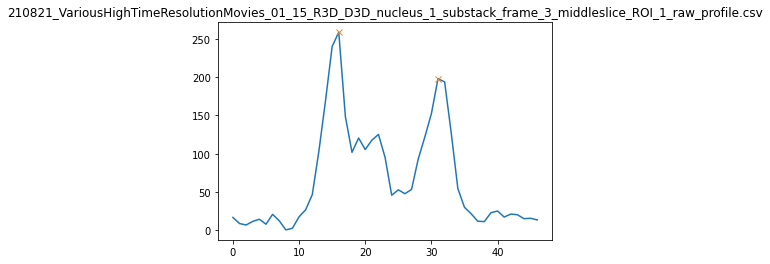

Number of Peaks: 2
[15 35]
NEs: [15 35]
Peak Dist.: 20
Nuc Mid:  25
NucStart:  20 NucEnd:  30
NucInt Point:  51.591
NucInt padded:  61


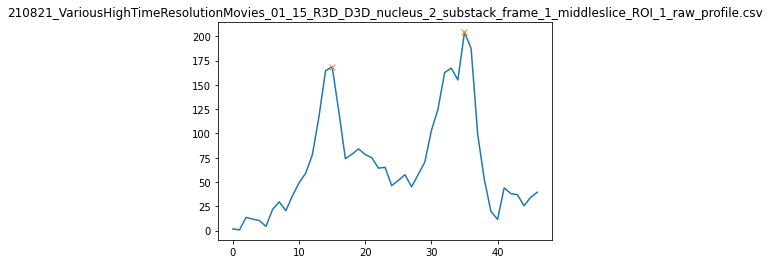

Number of Peaks: 2
[15 32]
NEs: [15 32]
Peak Dist.: 17
Nuc Mid:  23
NucStart:  19 NucEnd:  28
NucInt Point:  46.616
NucInt padded:  74


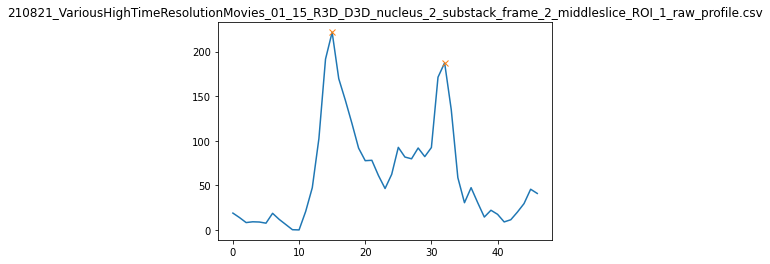

Number of Peaks: 2
[16 33]
NEs: [16 33]
Peak Dist.: 17
Nuc Mid:  24
NucStart:  20 NucEnd:  29
NucInt Point:  40.56
NucInt padded:  44


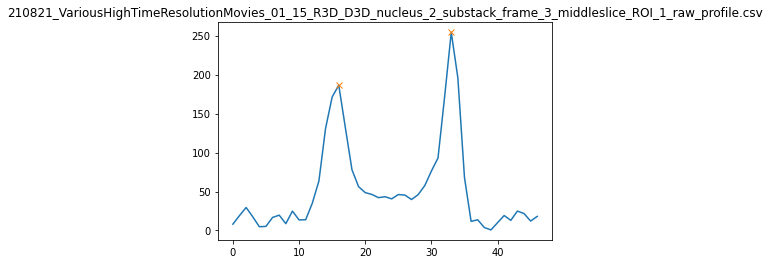

Number of Peaks: 2
[11 33]
NEs: [11 33]
Peak Dist.: 22
Nuc Mid:  22
NucStart:  16 NucEnd:  28
NucInt Point:  70.175
NucInt padded:  81


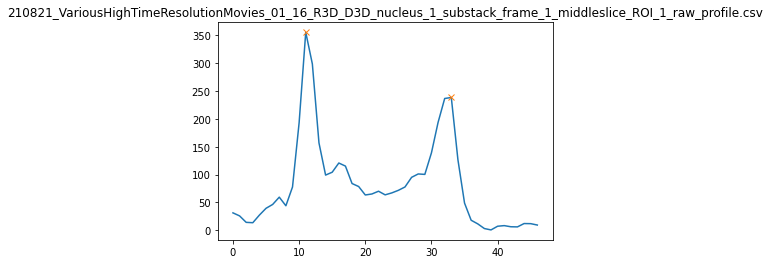

Number of Peaks: 2
[14 31]
NEs: [14 31]
Peak Dist.: 17
Nuc Mid:  22
NucStart:  18 NucEnd:  27
NucInt Point:  66.245
NucInt padded:  65


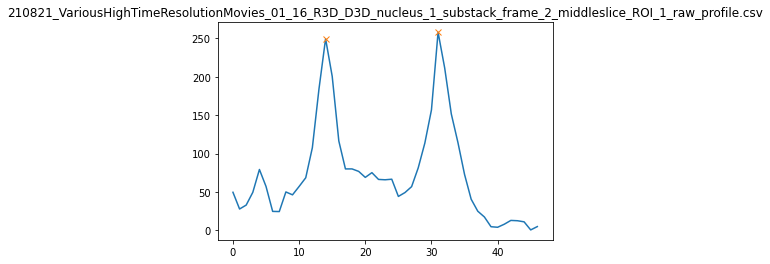

Number of Peaks: 2
[14 30]
NEs: [14 30]
Peak Dist.: 16
Nuc Mid:  22
NucStart:  18 NucEnd:  26
NucInt Point:  74.03
NucInt padded:  71


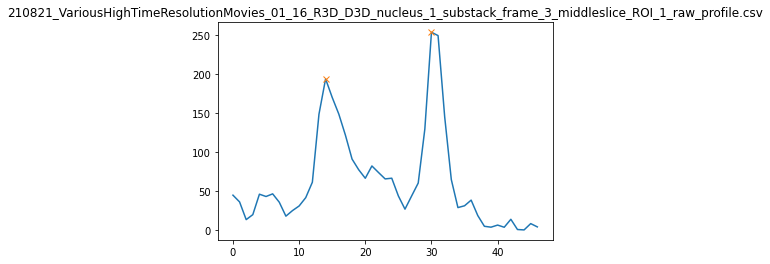

Number of Peaks: 2
[14 32]
NEs: [14 32]
Peak Dist.: 18
Nuc Mid:  23
NucStart:  18 NucEnd:  28
NucInt Point:  68.023
NucInt padded:  72


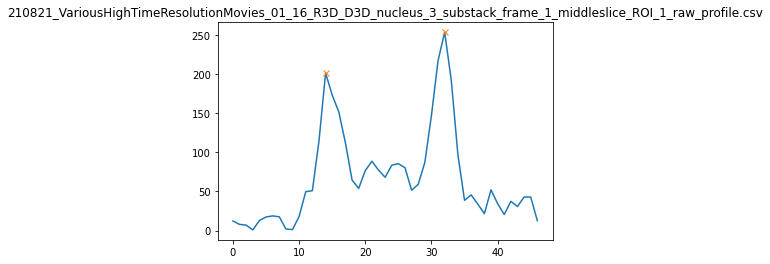

Number of Peaks: 2
[13 31]
NEs: [13 31]
Peak Dist.: 18
Nuc Mid:  22
NucStart:  17 NucEnd:  27
NucInt Point:  50.994
NucInt padded:  54


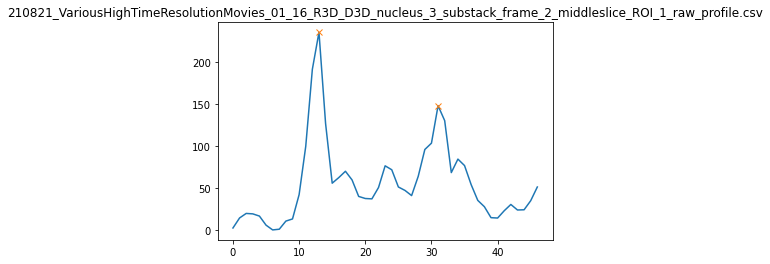

Number of Peaks: 2
[15 30]
NEs: [15 30]
Peak Dist.: 15
Nuc Mid:  22
NucStart:  18 NucEnd:  27
NucInt Point:  71.837
NucInt padded:  59


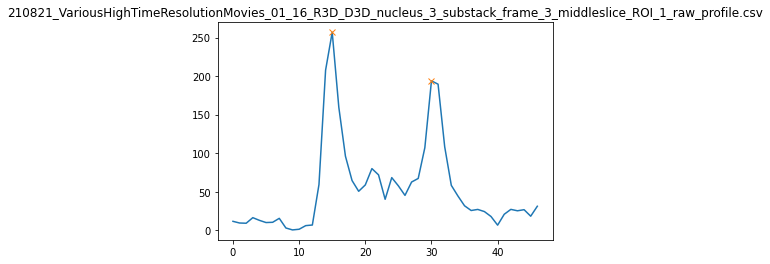

Number of Peaks: 2
[11 33]
NEs: [11 33]
Peak Dist.: 22
Nuc Mid:  22
NucStart:  16 NucEnd:  28
NucInt Point:  58.507999999999996
NucInt padded:  48


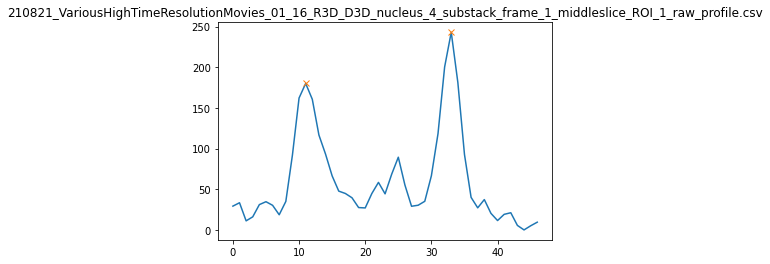

Number of Peaks: 2
[14 30]
NEs: [14 30]
Peak Dist.: 16
Nuc Mid:  22
NucStart:  18 NucEnd:  26
NucInt Point:  99.72
NucInt padded:  99


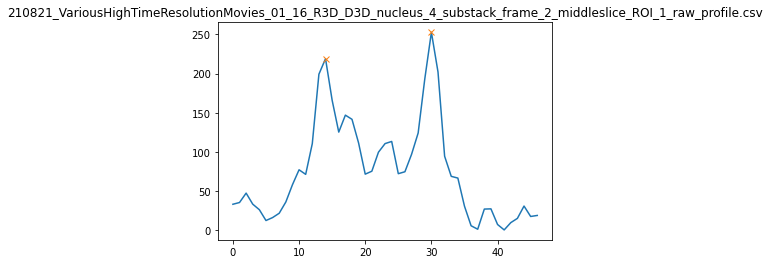

Number of Peaks: 2
[15 31]
NEs: [15 31]
Peak Dist.: 16
Nuc Mid:  23
NucStart:  19 NucEnd:  27
NucInt Point:  53.344
NucInt padded:  68


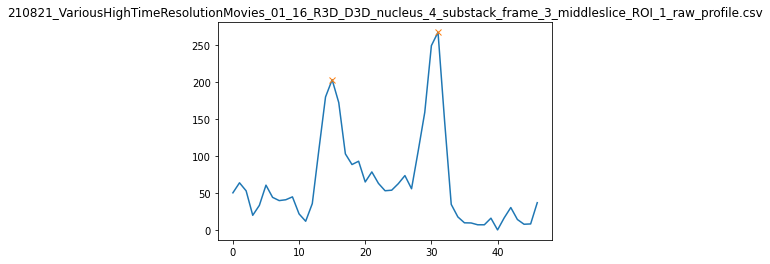

Number of Peaks: 3
[10 17 35]


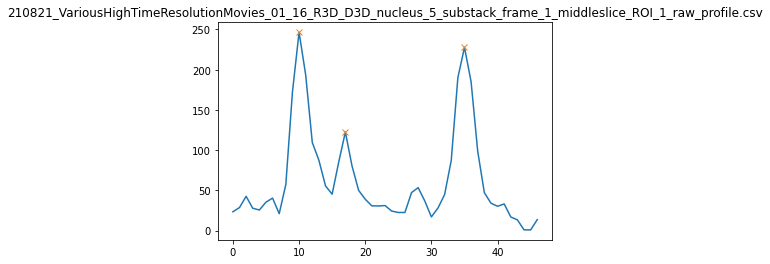

Choose NE1 Peak X position10
Choose NE2 Peak X position35
NEs: [10 35]
Peak Dist.: 25
Nuc Mid:  22
NucStart:  16 NucEnd:  28
NucInt Point:  30.627000000000002
NucInt padded:  48.885


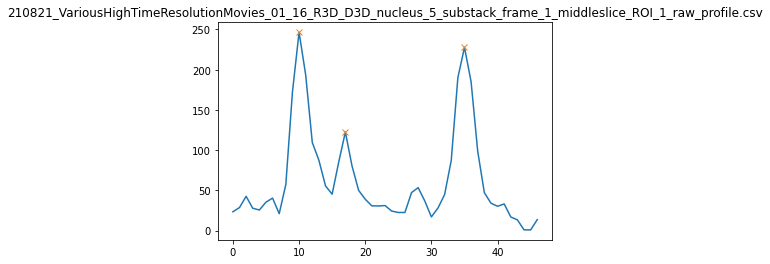

Number of Peaks: 2
[14 33]
NEs: [14 33]
Peak Dist.: 19
Nuc Mid:  23
NucStart:  18 NucEnd:  29
NucInt Point:  32.571
NucInt padded:  52


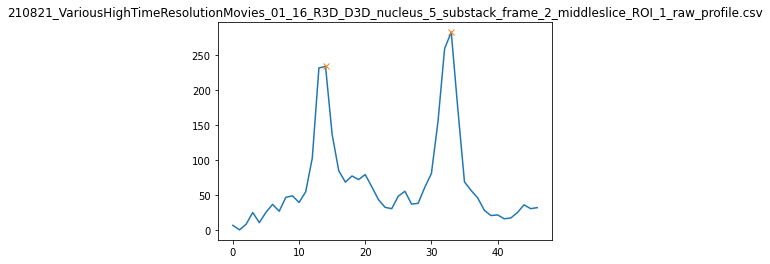

Number of Peaks: 2
[14 31]
NEs: [14 31]
Peak Dist.: 17
Nuc Mid:  22
NucStart:  18 NucEnd:  27
NucInt Point:  30.57
NucInt padded:  47


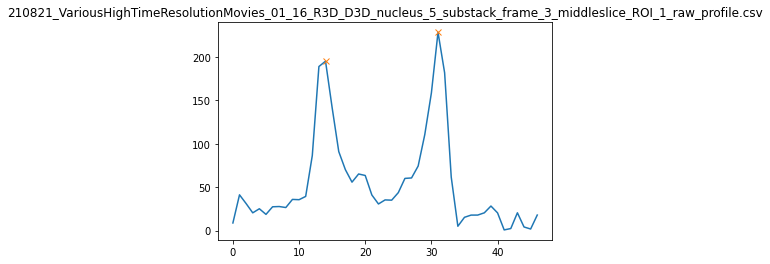

Number of Peaks: 2
[12 35]
NEs: [12 35]
Peak Dist.: 23
Nuc Mid:  23
NucStart:  17 NucEnd:  30
NucInt Point:  63.419
NucInt padded:  76


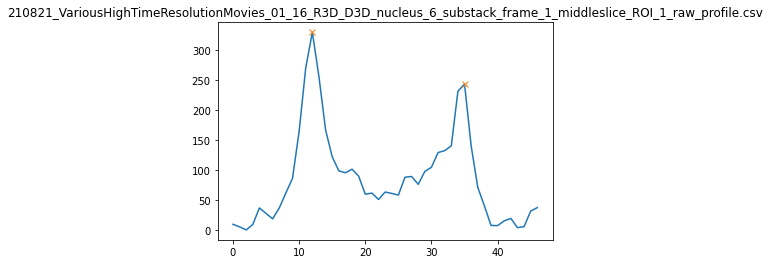

Number of Peaks: 2
[15 31]
NEs: [15 31]
Peak Dist.: 16
Nuc Mid:  23
NucStart:  19 NucEnd:  27
NucInt Point:  73.448
NucInt padded:  52


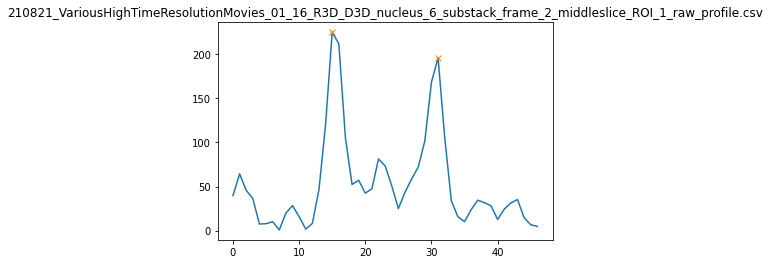

Number of Peaks: 2
[13 31]
NEs: [13 31]
Peak Dist.: 18
Nuc Mid:  22
NucStart:  17 NucEnd:  27
NucInt Point:  74.664
NucInt padded:  89


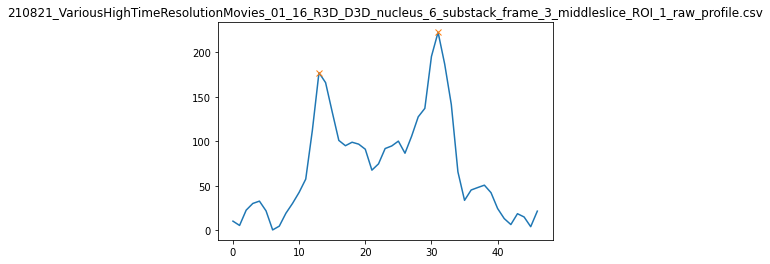

Number of Peaks: 2
[11 35]
NEs: [11 35]
Peak Dist.: 24
Nuc Mid:  23
NucStart:  17 NucEnd:  29
NucInt Point:  63.870000000000005
NucInt padded:  67


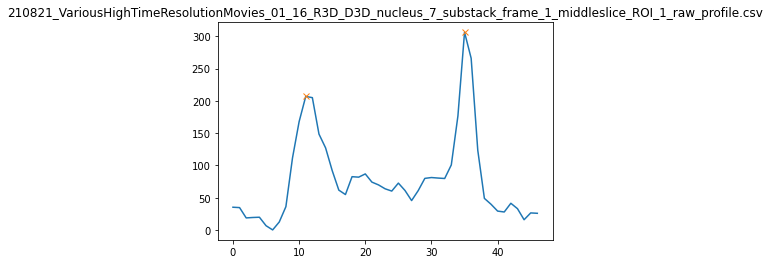

Number of Peaks: 2
[15 30]
NEs: [15 30]
Peak Dist.: 15
Nuc Mid:  22
NucStart:  18 NucEnd:  27
NucInt Point:  81.728
NucInt padded:  73


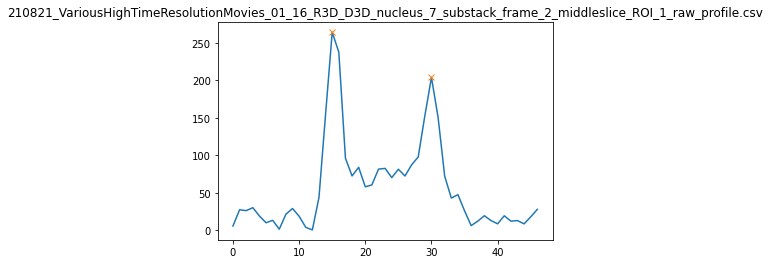

Number of Peaks: 2
[13 32]
NEs: [13 32]
Peak Dist.: 19
Nuc Mid:  22
NucStart:  17 NucEnd:  28
NucInt Point:  54.067
NucInt padded:  81


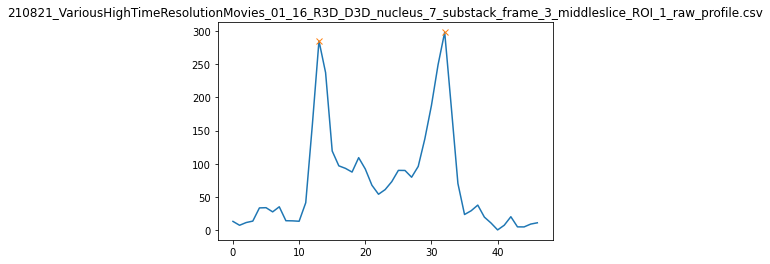

Number of Peaks: 2
[10 33]
NEs: [10 33]
Peak Dist.: 23
Nuc Mid:  21
NucStart:  15 NucEnd:  28
NucInt Point:  37.504
NucInt padded:  38


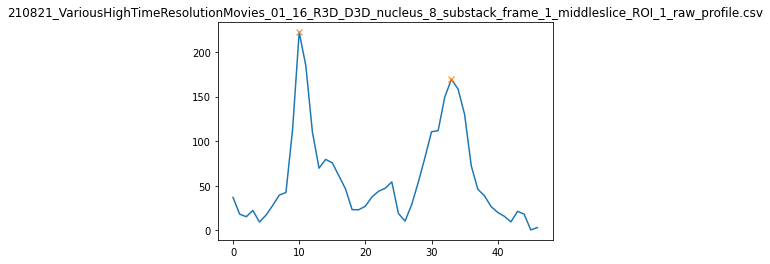

Number of Peaks: 2
[14 30]
NEs: [14 30]
Peak Dist.: 16
Nuc Mid:  22
NucStart:  18 NucEnd:  26
NucInt Point:  57.333
NucInt padded:  69


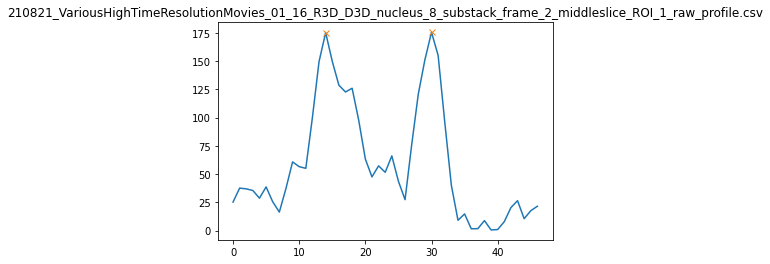

Number of Peaks: 2
[14 30]
NEs: [14 30]
Peak Dist.: 16
Nuc Mid:  22
NucStart:  18 NucEnd:  26
NucInt Point:  16.152
NucInt padded:  41


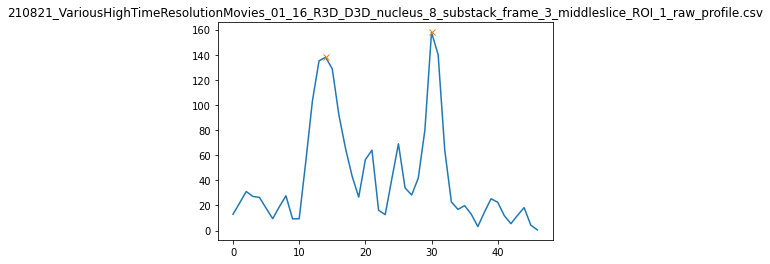

Number of Peaks: 2
[12 35]
NEs: [12 35]
Peak Dist.: 23
Nuc Mid:  23
NucStart:  17 NucEnd:  30
NucInt Point:  43.281
NucInt padded:  86


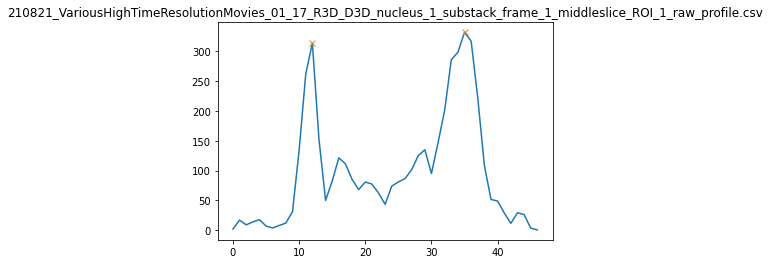

Number of Peaks: 2
[15 30]
NEs: [15 30]
Peak Dist.: 15
Nuc Mid:  22
NucStart:  18 NucEnd:  27
NucInt Point:  92.121
NucInt padded:  90


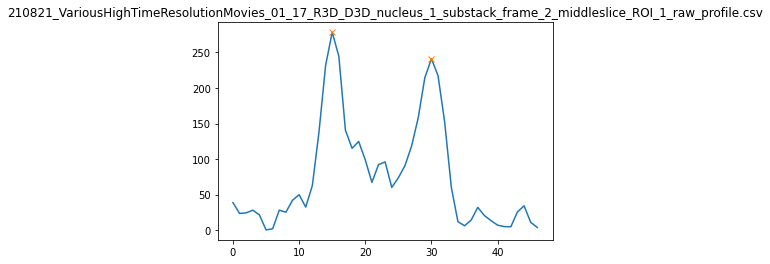

Number of Peaks: 2
[13 30]
NEs: [13 30]
Peak Dist.: 17
Nuc Mid:  21
NucStart:  17 NucEnd:  26
NucInt Point:  93.654
NucInt padded:  104


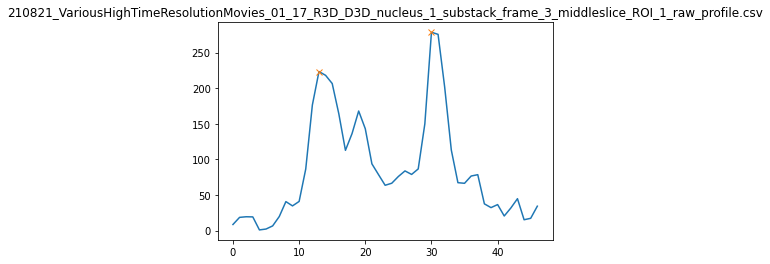

Number of Peaks: 2
[14 32]
NEs: [14 32]
Peak Dist.: 18
Nuc Mid:  23
NucStart:  18 NucEnd:  28
NucInt Point:  72.399
NucInt padded:  97


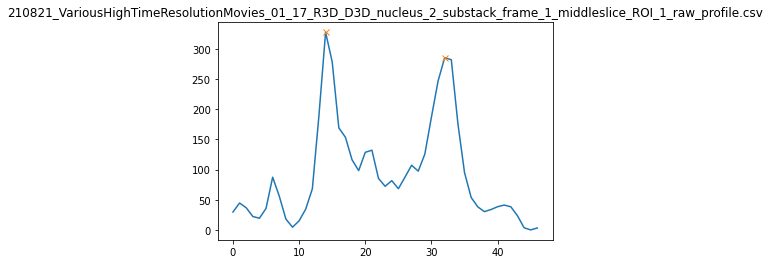

Number of Peaks: 2
[16 30]
NEs: [16 30]
Peak Dist.: 14
Nuc Mid:  23
NucStart:  19 NucEnd:  27
NucInt Point:  110.252
NucInt padded:  102


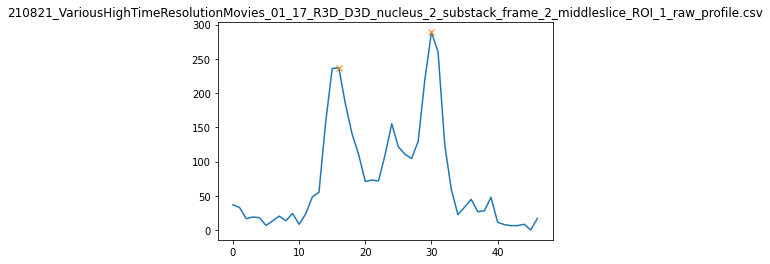

Number of Peaks: 2
[13 31]
NEs: [13 31]
Peak Dist.: 18
Nuc Mid:  22
NucStart:  17 NucEnd:  27
NucInt Point:  100.918
NucInt padded:  95


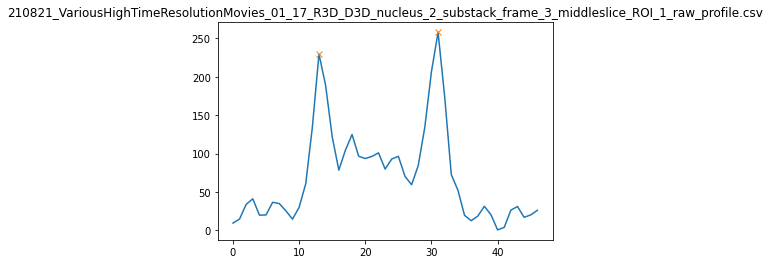

Number of Peaks: 2
[14 32]
NEs: [14 32]
Peak Dist.: 18
Nuc Mid:  23
NucStart:  18 NucEnd:  28
NucInt Point:  58.316
NucInt padded:  63


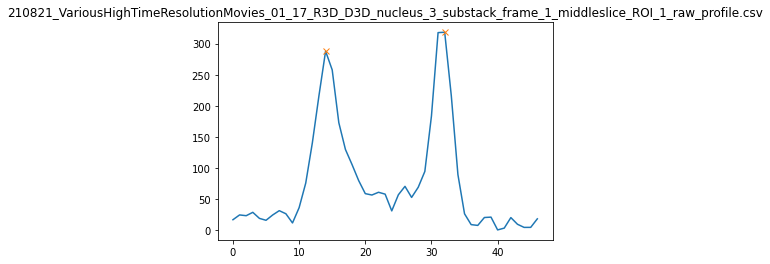

Number of Peaks: 2
[15 32]
NEs: [15 32]
Peak Dist.: 17
Nuc Mid:  23
NucStart:  19 NucEnd:  28
NucInt Point:  45.655
NucInt padded:  54


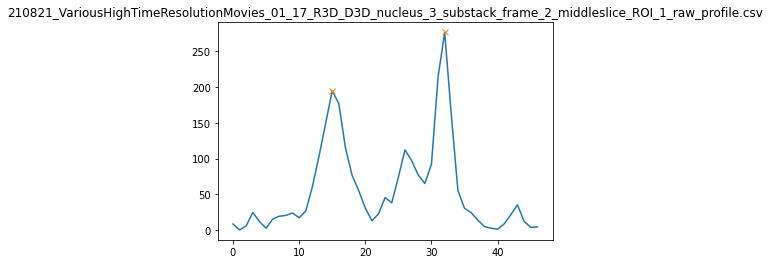

Number of Peaks: 2
[16 30]
NEs: [16 30]
Peak Dist.: 14
Nuc Mid:  23
NucStart:  19 NucEnd:  27
NucInt Point:  76.154
NucInt padded:  85


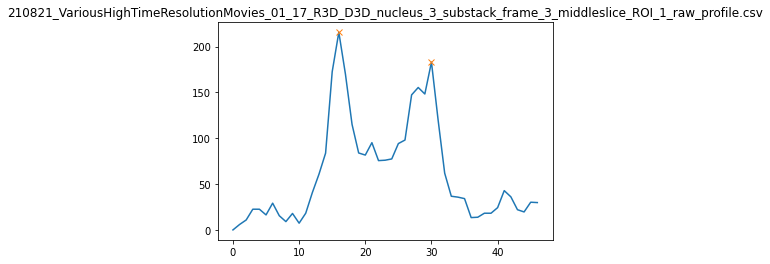

Number of Peaks: 2
[11 33]
NEs: [11 33]
Peak Dist.: 22
Nuc Mid:  22
NucStart:  16 NucEnd:  28
NucInt Point:  62.143
NucInt padded:  74


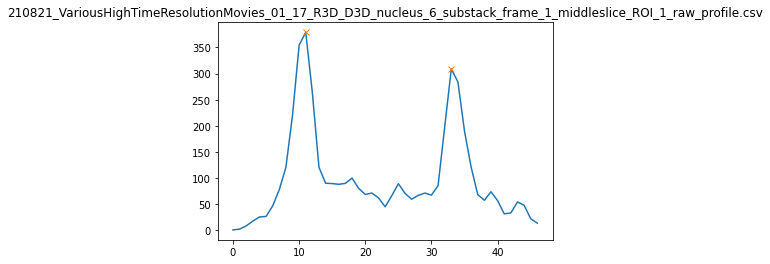

Number of Peaks: 2
[14 32]
NEs: [14 32]
Peak Dist.: 18
Nuc Mid:  23
NucStart:  18 NucEnd:  28
NucInt Point:  69.931
NucInt padded:  73


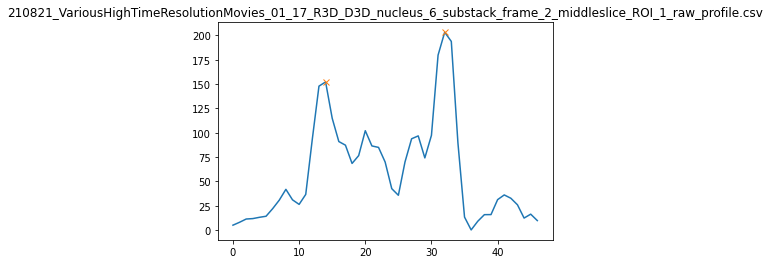

Number of Peaks: 2
[15 33]
NEs: [15 33]
Peak Dist.: 18
Nuc Mid:  24
NucStart:  19 NucEnd:  29
NucInt Point:  53.689
NucInt padded:  66


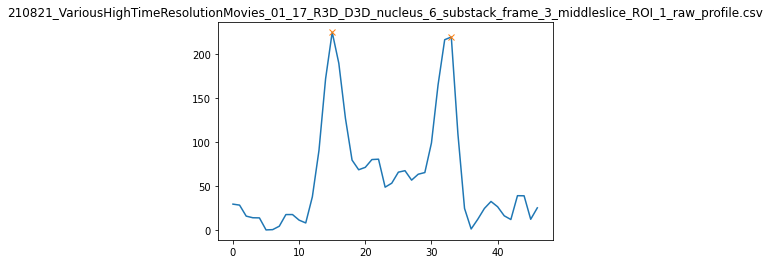

Number of Peaks: 2
[14 32]
NEs: [14 32]
Peak Dist.: 18
Nuc Mid:  23
NucStart:  18 NucEnd:  28
NucInt Point:  52.735
NucInt padded:  56


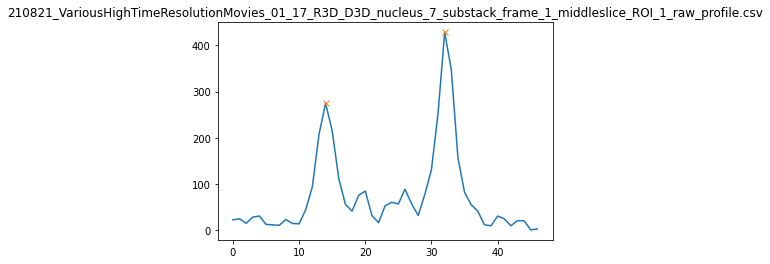

Number of Peaks: 2
[16 31]
NEs: [16 31]
Peak Dist.: 15
Nuc Mid:  23
NucStart:  19 NucEnd:  28
NucInt Point:  28.04
NucInt padded:  54


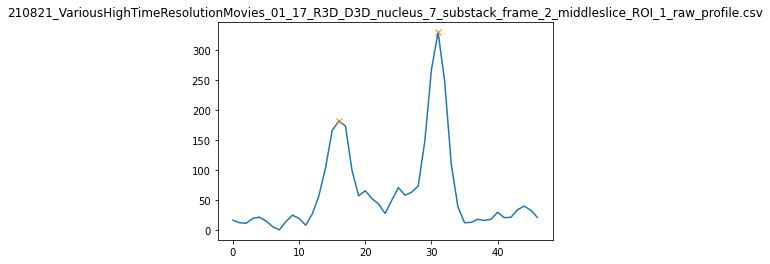

Number of Peaks: 2
[14 31]
NEs: [14 31]
Peak Dist.: 17
Nuc Mid:  22
NucStart:  18 NucEnd:  27
NucInt Point:  48.934
NucInt padded:  73


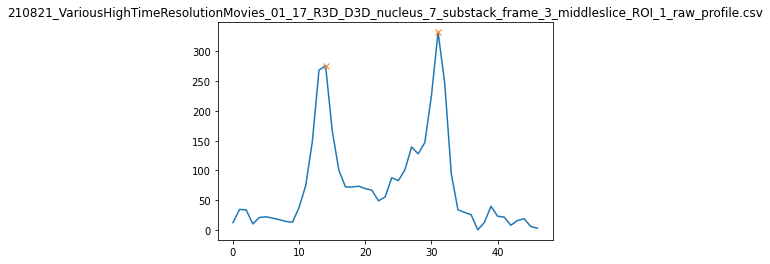

Number of Peaks: 2
[14 32]
NEs: [14 32]
Peak Dist.: 18
Nuc Mid:  23
NucStart:  18 NucEnd:  28
NucInt Point:  79.32
NucInt padded:  68


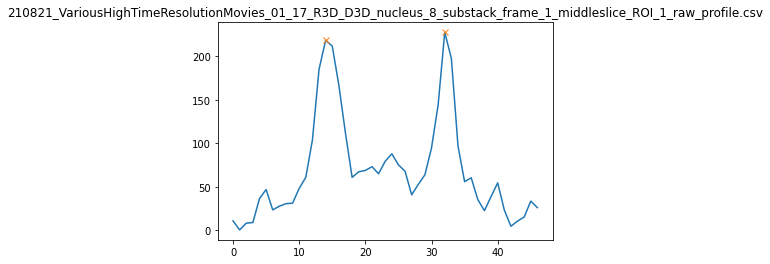

Number of Peaks: 2
[15 33]
NEs: [15 33]
Peak Dist.: 18
Nuc Mid:  24
NucStart:  19 NucEnd:  29
NucInt Point:  87.679
NucInt padded:  91


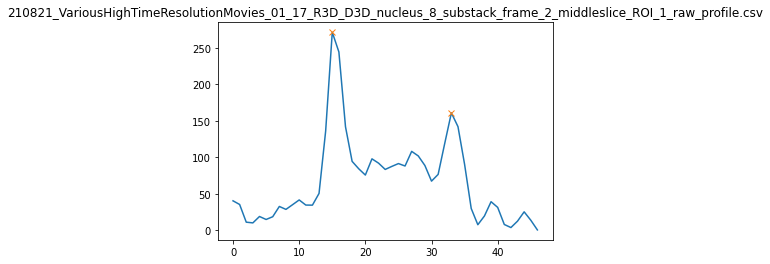

Number of Peaks: 2
[17 33]
NEs: [17 33]
Peak Dist.: 16
Nuc Mid:  25
NucStart:  21 NucEnd:  29
NucInt Point:  106.191
NucInt padded:  72


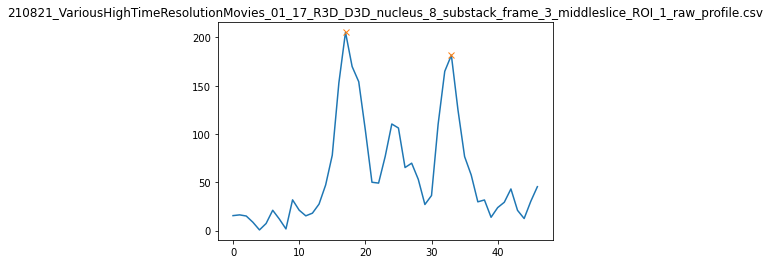

Number of Peaks: 2
[15 36]
NEs: [15 36]
Peak Dist.: 21
Nuc Mid:  25
NucStart:  20 NucEnd:  31
NucInt Point:  64.476
NucInt padded:  68


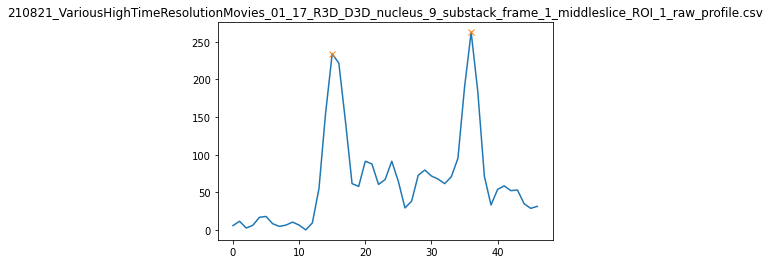

Number of Peaks: 2
[15 30]
NEs: [15 30]
Peak Dist.: 15
Nuc Mid:  22
NucStart:  18 NucEnd:  27
NucInt Point:  70.522
NucInt padded:  79


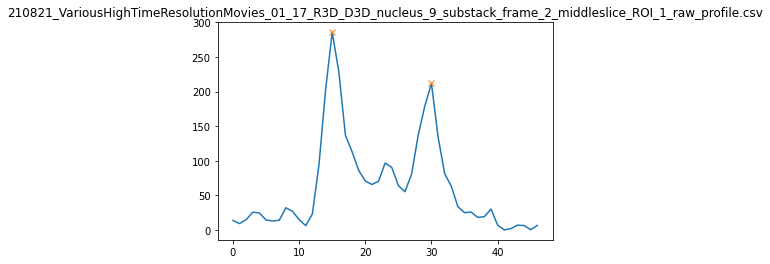

Number of Peaks: 2
[14 32]
NEs: [14 32]
Peak Dist.: 18
Nuc Mid:  23
NucStart:  18 NucEnd:  28
NucInt Point:  76.014
NucInt padded:  74


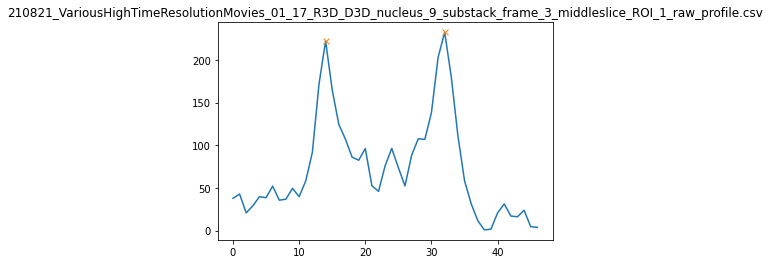

Number of Peaks: 2
[11 31]
NEs: [11 31]
Peak Dist.: 20
Nuc Mid:  21
NucStart:  16 NucEnd:  26
NucInt Point:  36.324
NucInt padded:  50


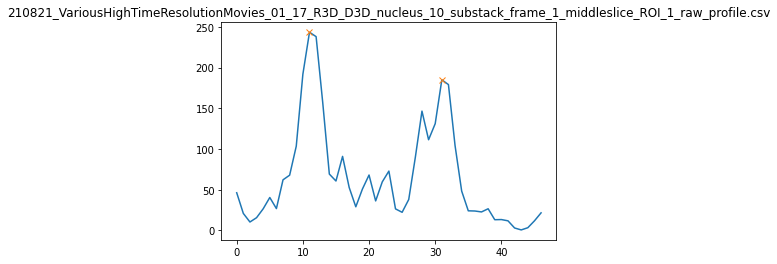

Number of Peaks: 2
[17 32]
NEs: [17 32]
Peak Dist.: 15
Nuc Mid:  24
NucStart:  20 NucEnd:  29
NucInt Point:  20.927
NucInt padded:  43


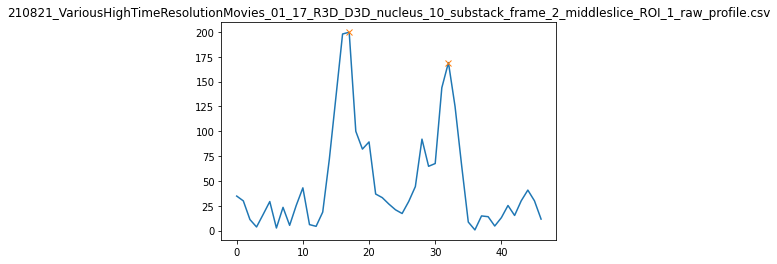

Number of Peaks: 2
[16 30]
NEs: [16 30]
Peak Dist.: 14
Nuc Mid:  23
NucStart:  19 NucEnd:  27
NucInt Point:  55.257
NucInt padded:  54


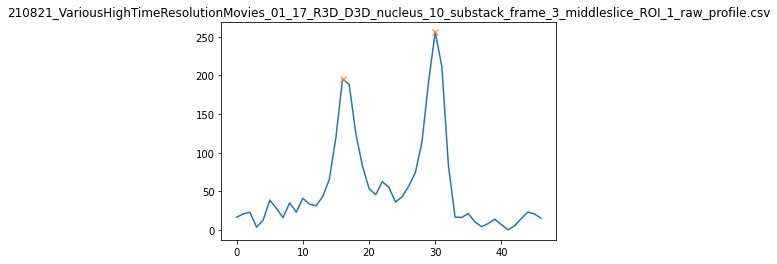

Number of Peaks: 3
[15 27 33]


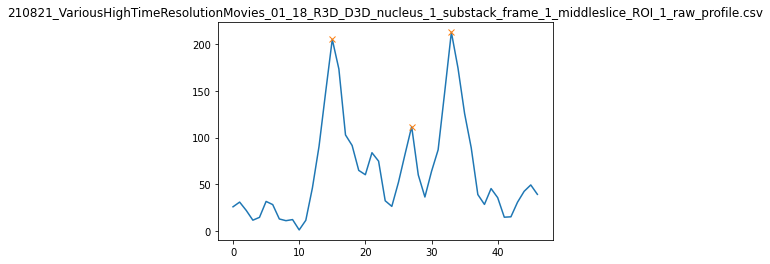

Choose NE1 Peak X position15
Choose NE2 Peak X position33
NEs: [15 33]
Peak Dist.: 18
Nuc Mid:  24
NucStart:  19 NucEnd:  28
NucInt Point:  26.128999999999998
NucInt padded:  65.24588888888889


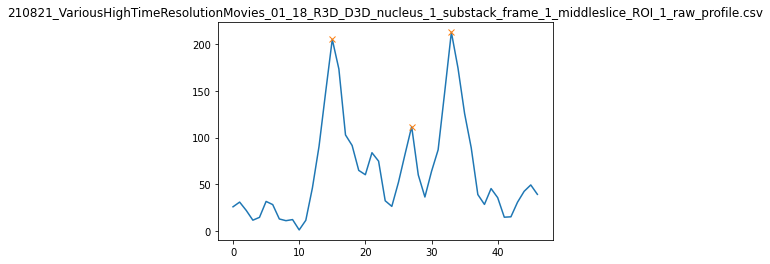

Number of Peaks: 2
[15 30]
NEs: [15 30]
Peak Dist.: 15
Nuc Mid:  22
NucStart:  18 NucEnd:  27
NucInt Point:  55.104
NucInt padded:  63


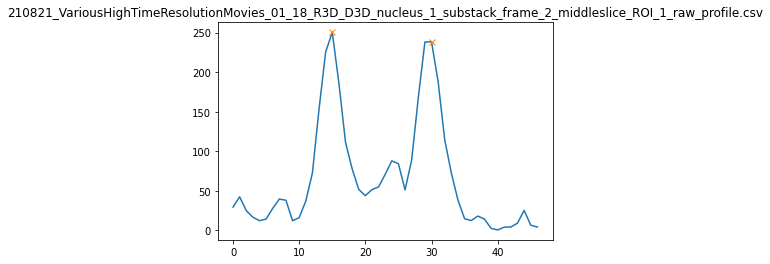

Number of Peaks: 2
[17 31]
NEs: [17 31]
Peak Dist.: 14
Nuc Mid:  24
NucStart:  20 NucEnd:  28
NucInt Point:  86.064
NucInt padded:  86


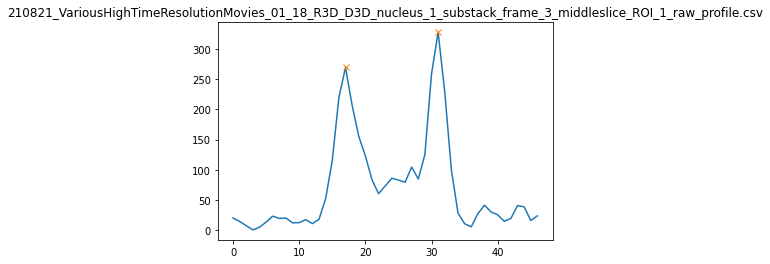

Number of Peaks: 2
[13 32]
NEs: [13 32]
Peak Dist.: 19
Nuc Mid:  22
NucStart:  17 NucEnd:  28
NucInt Point:  68.875
NucInt padded:  61


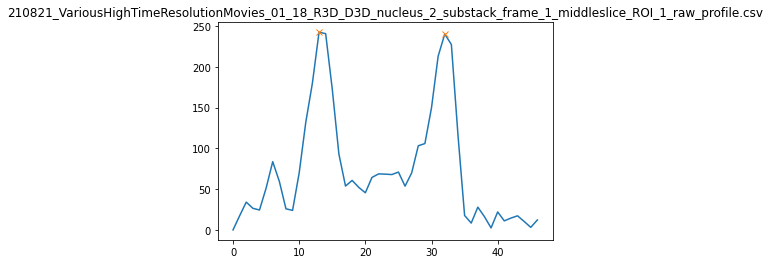

Number of Peaks: 2
[14 33]
NEs: [14 33]
Peak Dist.: 19
Nuc Mid:  23
NucStart:  18 NucEnd:  29
NucInt Point:  41.068
NucInt padded:  59


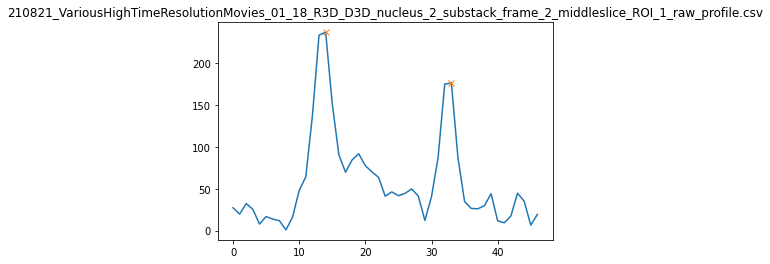

Number of Peaks: 2
[16 32]
NEs: [16 32]
Peak Dist.: 16
Nuc Mid:  24
NucStart:  20 NucEnd:  28
NucInt Point:  49.934
NucInt padded:  65


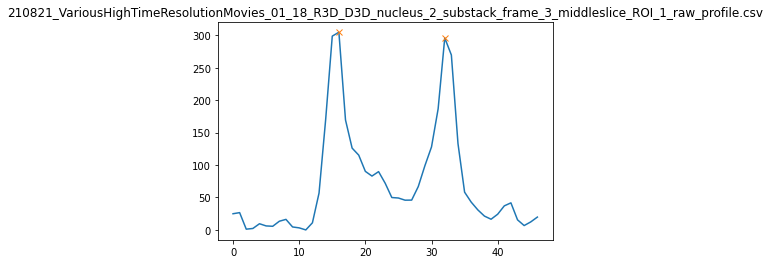

Number of Peaks: 2
[13 34]
NEs: [13 34]
Peak Dist.: 21
Nuc Mid:  23
NucStart:  18 NucEnd:  29
NucInt Point:  78.866
NucInt padded:  57


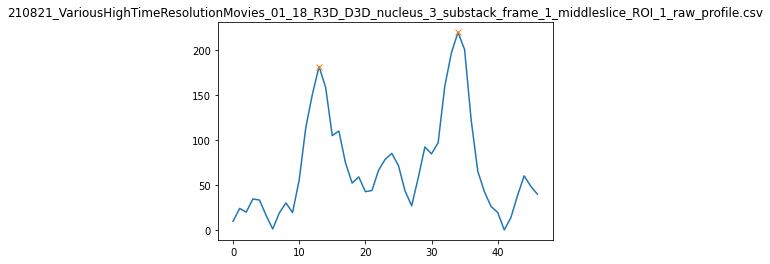

Number of Peaks: 2
[15 31]
NEs: [15 31]
Peak Dist.: 16
Nuc Mid:  23
NucStart:  19 NucEnd:  27
NucInt Point:  57.218
NucInt padded:  55


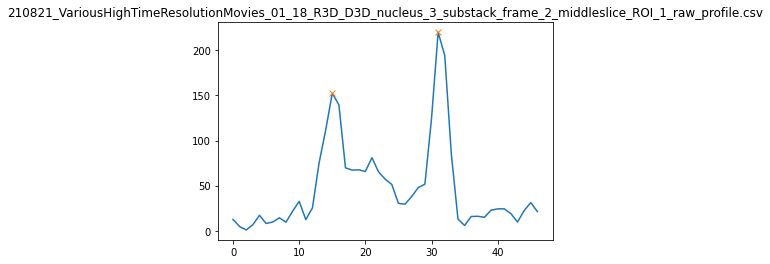

Number of Peaks: 2
[14 31]
NEs: [14 31]
Peak Dist.: 17
Nuc Mid:  22
NucStart:  18 NucEnd:  27
NucInt Point:  63.607
NucInt padded:  51


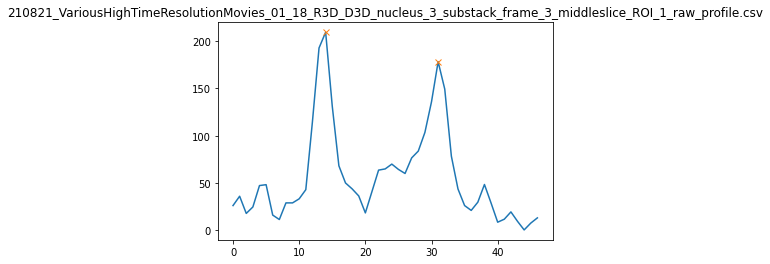

Number of Peaks: 2
[12 34]
NEs: [12 34]
Peak Dist.: 22
Nuc Mid:  23
NucStart:  17 NucEnd:  29
NucInt Point:  60.114999999999995
NucInt padded:  59


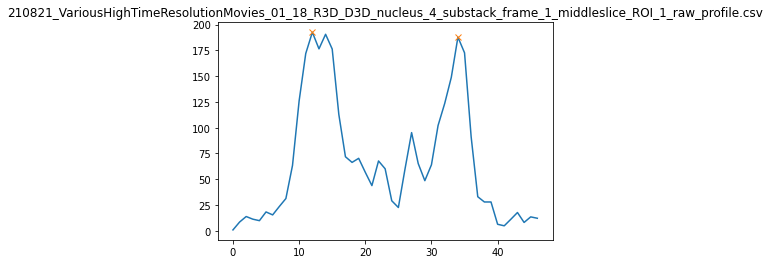

Number of Peaks: 2
[14 30]
NEs: [14 30]
Peak Dist.: 16
Nuc Mid:  22
NucStart:  18 NucEnd:  26
NucInt Point:  28.662999999999997
NucInt padded:  40


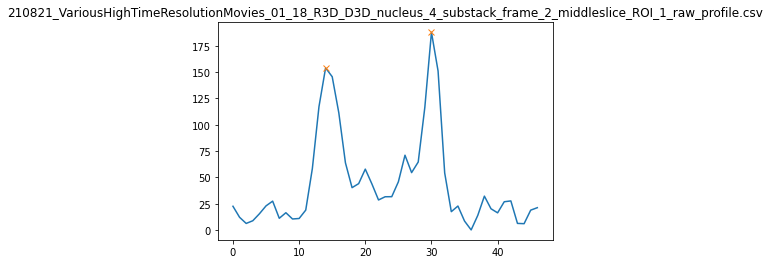

Number of Peaks: 2
[17 33]
NEs: [17 33]
Peak Dist.: 16
Nuc Mid:  25
NucStart:  21 NucEnd:  29
NucInt Point:  72.426
NucInt padded:  93


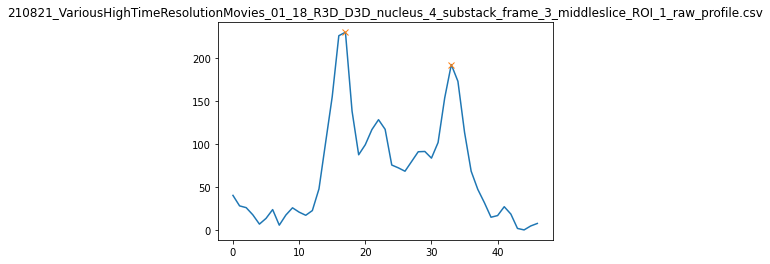

Number of Peaks: 3
[13 22 33]


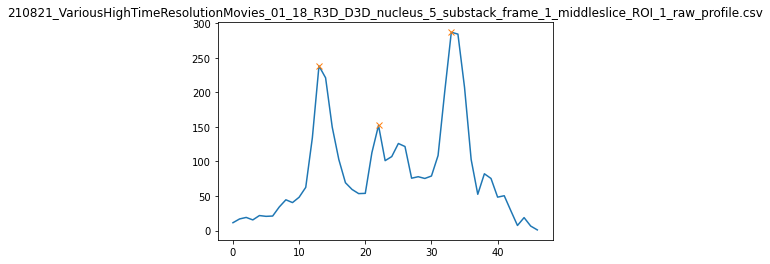

Choose NE1 Peak X position13
Choose NE2 Peak X position33
NEs: [13 33]
Peak Dist.: 20
Nuc Mid:  23
NucStart:  18 NucEnd:  28
NucInt Point:  101.22
NucInt padded:  96.38239999999999


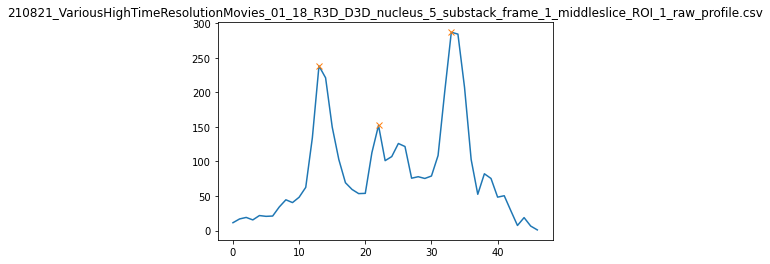

Number of Peaks: 2
[16 29]
NEs: [16 29]
Peak Dist.: 13
Nuc Mid:  22
NucStart:  19 NucEnd:  26
NucInt Point:  37.417
NucInt padded:  50


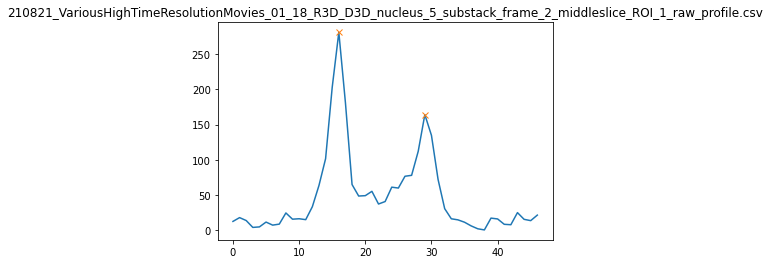

Number of Peaks: 2
[15 31]
NEs: [15 31]
Peak Dist.: 16
Nuc Mid:  23
NucStart:  19 NucEnd:  27
NucInt Point:  84.832
NucInt padded:  106


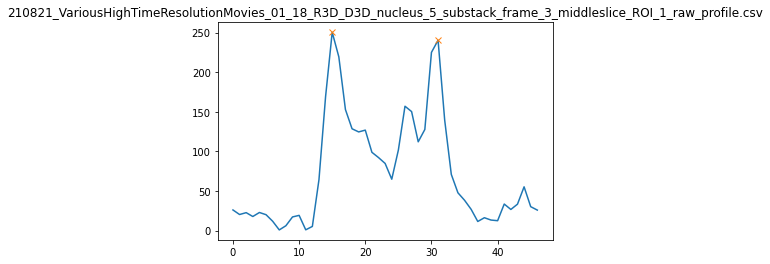

Number of Peaks: 2
[12 33]
NEs: [12 33]
Peak Dist.: 21
Nuc Mid:  22
NucStart:  17 NucEnd:  28
NucInt Point:  24.365000000000002
NucInt padded:  43


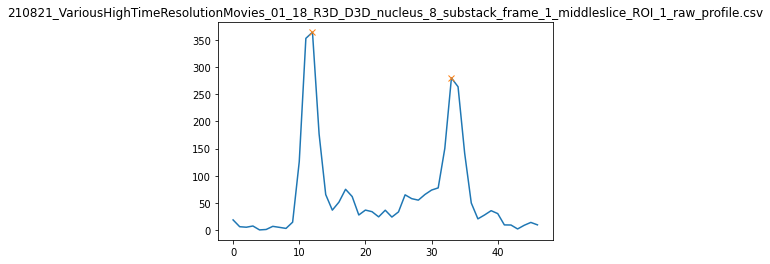

Number of Peaks: 2
[17 33]
NEs: [17 33]
Peak Dist.: 16
Nuc Mid:  25
NucStart:  21 NucEnd:  29
NucInt Point:  58.463
NucInt padded:  53


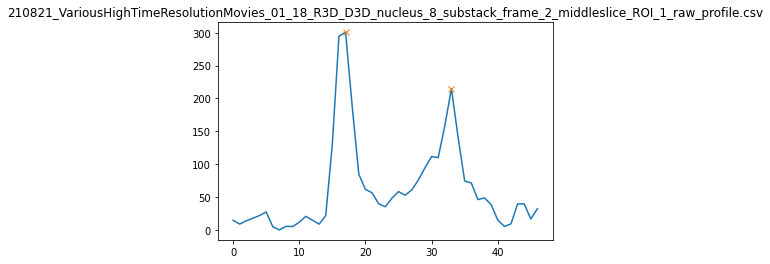

Number of Peaks: 2
[11 34]
NEs: [11 34]
Peak Dist.: 23
Nuc Mid:  22
NucStart:  16 NucEnd:  29
NucInt Point:  68.576
NucInt padded:  76


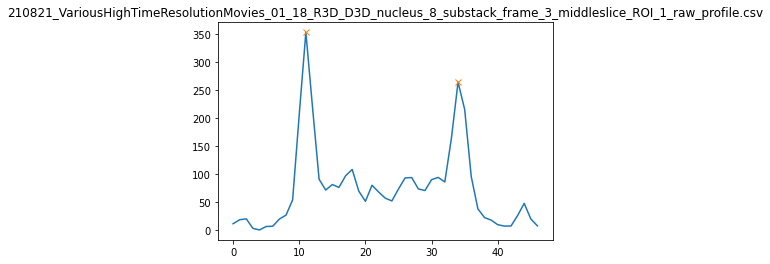

Number of Peaks: 2
[14 32]
NEs: [14 32]
Peak Dist.: 18
Nuc Mid:  23
NucStart:  18 NucEnd:  28
NucInt Point:  72.476
NucInt padded:  73


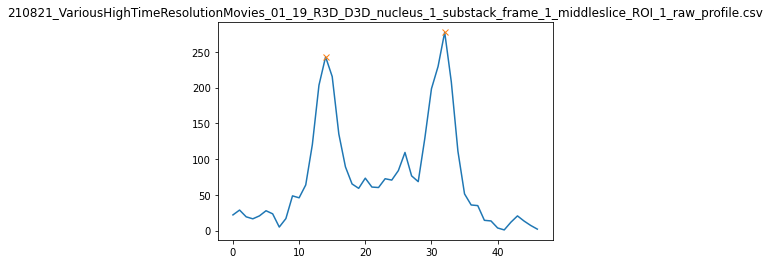

Number of Peaks: 2
[16 32]
NEs: [16 32]
Peak Dist.: 16
Nuc Mid:  24
NucStart:  20 NucEnd:  28
NucInt Point:  74.712
NucInt padded:  66


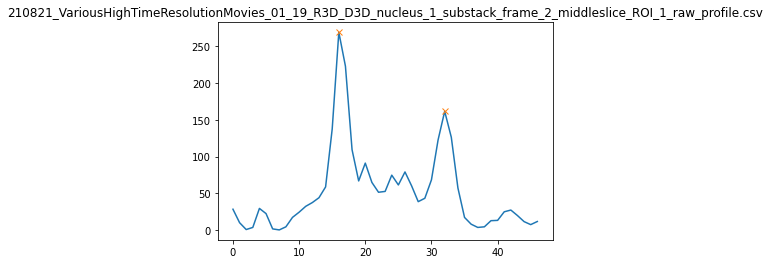

Number of Peaks: 2
[15 30]
NEs: [15 30]
Peak Dist.: 15
Nuc Mid:  22
NucStart:  18 NucEnd:  27
NucInt Point:  35.153
NucInt padded:  69


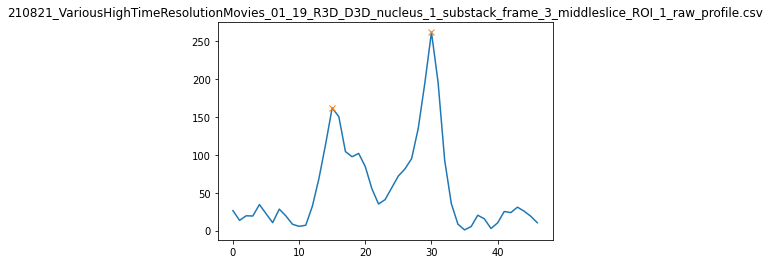

Number of Peaks: 2
[13 31]
NEs: [13 31]
Peak Dist.: 18
Nuc Mid:  22
NucStart:  17 NucEnd:  27
NucInt Point:  49.862
NucInt padded:  40


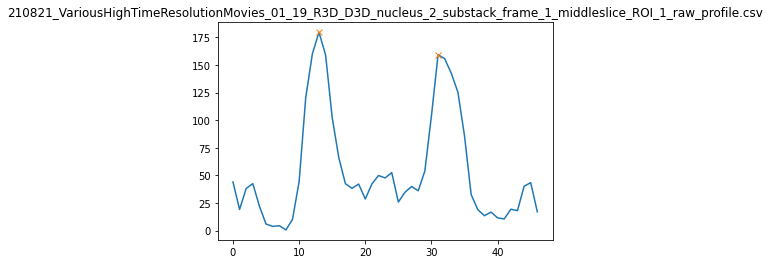

Number of Peaks: 2
[15 31]
NEs: [15 31]
Peak Dist.: 16
Nuc Mid:  23
NucStart:  19 NucEnd:  27
NucInt Point:  13.399999999999999
NucInt padded:  45


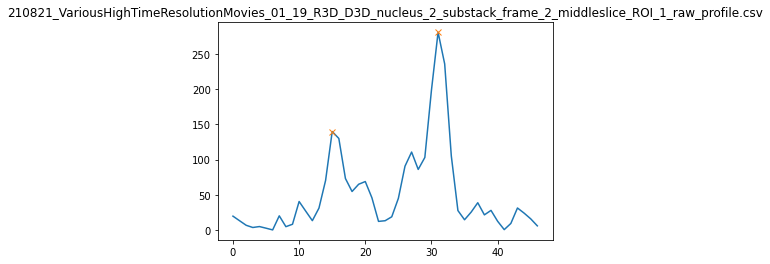

Number of Peaks: 2
[14 32]
NEs: [14 32]
Peak Dist.: 18
Nuc Mid:  23
NucStart:  18 NucEnd:  28
NucInt Point:  29.198
NucInt padded:  42


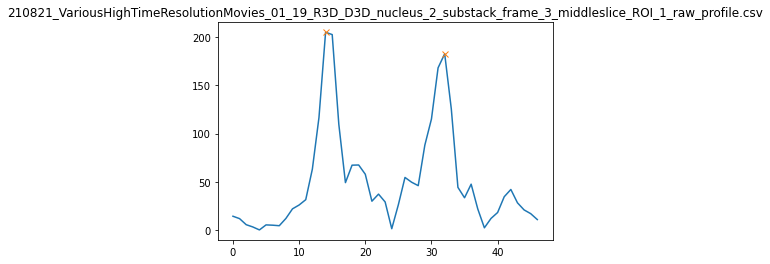

Number of Peaks: 2
[13 35]
NEs: [13 35]
Peak Dist.: 22
Nuc Mid:  24
NucStart:  18 NucEnd:  30
NucInt Point:  73.609
NucInt padded:  58


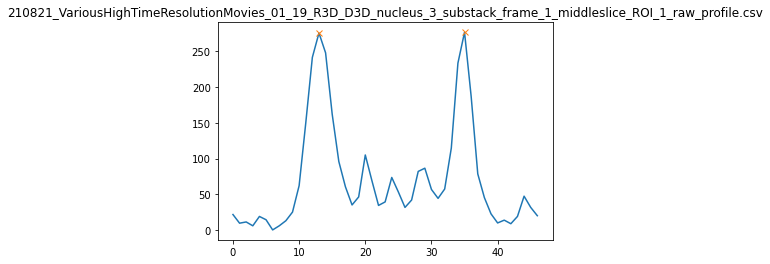

Number of Peaks: 2
[15 32]
NEs: [15 32]
Peak Dist.: 17
Nuc Mid:  23
NucStart:  19 NucEnd:  28
NucInt Point:  104.368
NucInt padded:  89


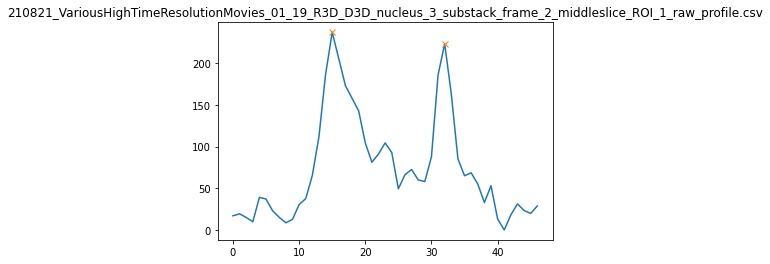

Number of Peaks: 2
[15 31]
NEs: [15 31]
Peak Dist.: 16
Nuc Mid:  23
NucStart:  19 NucEnd:  27
NucInt Point:  47.384
NucInt padded:  59


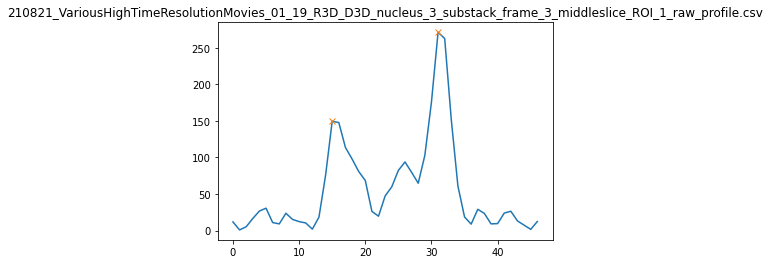

Number of Peaks: 2
[13 33]
NEs: [13 33]
Peak Dist.: 20
Nuc Mid:  23
NucStart:  18 NucEnd:  28
NucInt Point:  27.985
NucInt padded:  49


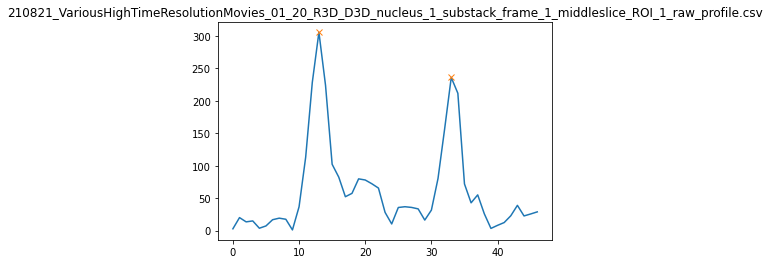

Number of Peaks: 2
[16 30]
NEs: [16 30]
Peak Dist.: 14
Nuc Mid:  23
NucStart:  19 NucEnd:  27
NucInt Point:  63.681
NucInt padded:  82


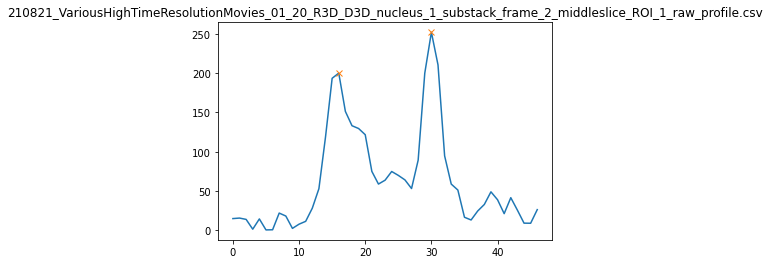

Number of Peaks: 2
[11 31]
NEs: [11 31]
Peak Dist.: 20
Nuc Mid:  21
NucStart:  16 NucEnd:  26
NucInt Point:  20.648000000000003
NucInt padded:  41


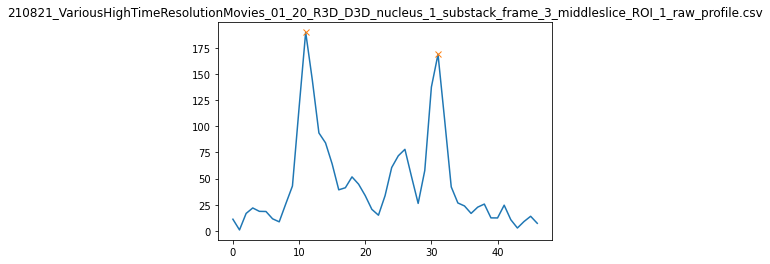

Number of Peaks: 2
[11 34]
NEs: [11 34]
Peak Dist.: 23
Nuc Mid:  22
NucStart:  16 NucEnd:  29
NucInt Point:  64.326
NucInt padded:  55


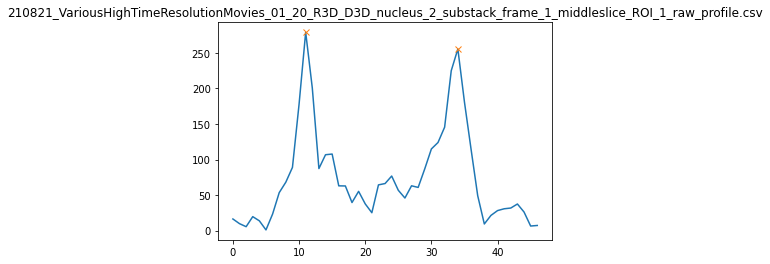

Number of Peaks: 2
[15 34]
NEs: [15 34]
Peak Dist.: 19
Nuc Mid:  24
NucStart:  19 NucEnd:  30
NucInt Point:  81.174
NucInt padded:  54


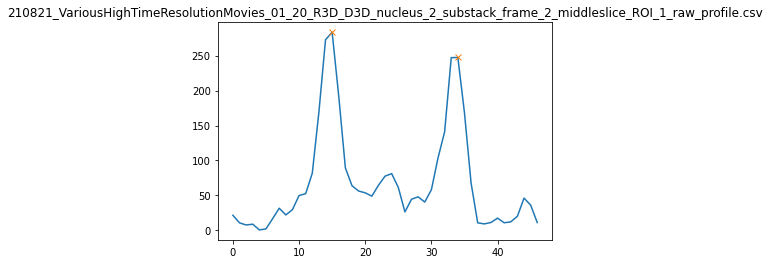

Number of Peaks: 2
[15 32]
NEs: [15 32]
Peak Dist.: 17
Nuc Mid:  23
NucStart:  19 NucEnd:  28
NucInt Point:  47.783
NucInt padded:  43


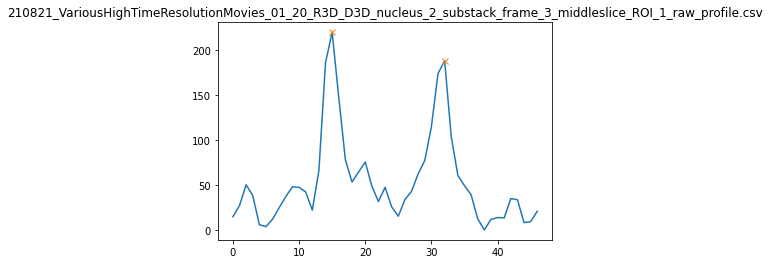

Number of Peaks: 2
[12 33]
NEs: [12 33]
Peak Dist.: 21
Nuc Mid:  22
NucStart:  17 NucEnd:  28
NucInt Point:  48.398
NucInt padded:  54


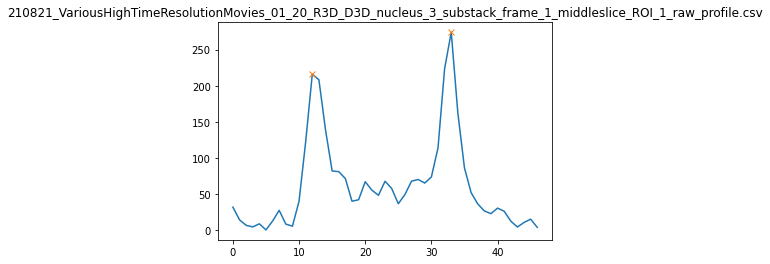

Number of Peaks: 2
[17 29]
NEs: [17 29]
Peak Dist.: 12
Nuc Mid:  23
NucStart:  20 NucEnd:  26
NucInt Point:  92.313
NucInt padded:  88


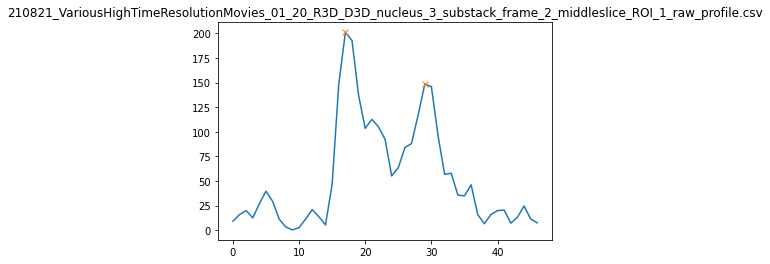

Number of Peaks: 2
[13 32]
NEs: [13 32]
Peak Dist.: 19
Nuc Mid:  22
NucStart:  17 NucEnd:  28
NucInt Point:  69.302
NucInt padded:  66


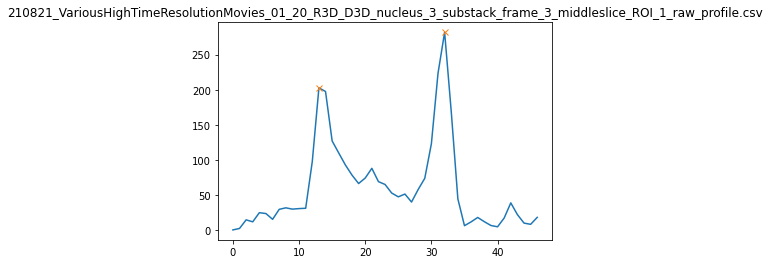

Number of Peaks: 2
[10 33]
NEs: [10 33]
Peak Dist.: 23
Nuc Mid:  21
NucStart:  15 NucEnd:  28
NucInt Point:  67.737
NucInt padded:  70


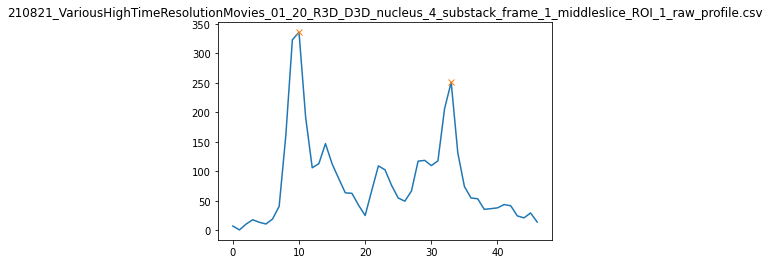

Number of Peaks: 2
[15 32]
NEs: [15 32]
Peak Dist.: 17
Nuc Mid:  23
NucStart:  19 NucEnd:  28
NucInt Point:  75.648
NucInt padded:  72


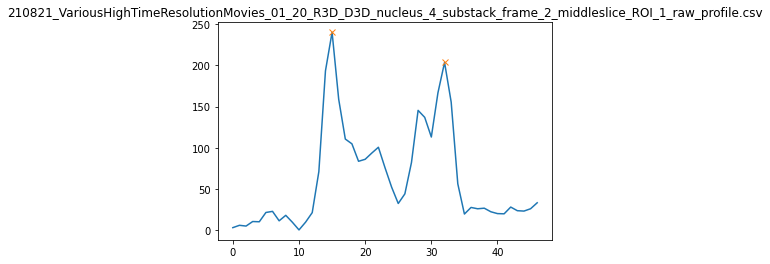

Number of Peaks: 2
[11 31]
NEs: [11 31]
Peak Dist.: 20
Nuc Mid:  21
NucStart:  16 NucEnd:  26
NucInt Point:  72.507
NucInt padded:  69


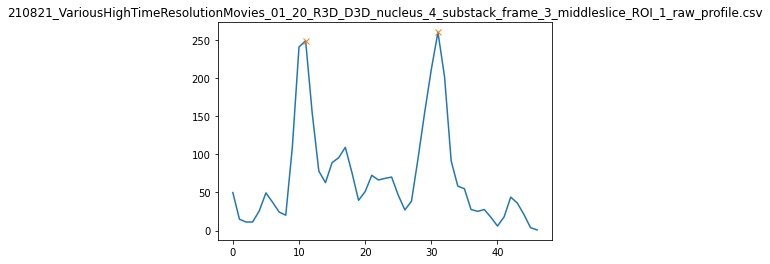

Number of Peaks: 2
[12 34]
NEs: [12 34]
Peak Dist.: 22
Nuc Mid:  23
NucStart:  17 NucEnd:  29
NucInt Point:  50.338
NucInt padded:  52


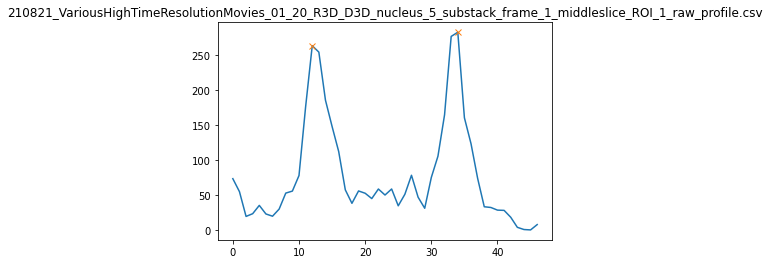

Number of Peaks: 2
[13 29]
NEs: [13 29]
Peak Dist.: 16
Nuc Mid:  21
NucStart:  17 NucEnd:  25
NucInt Point:  70.208
NucInt padded:  53


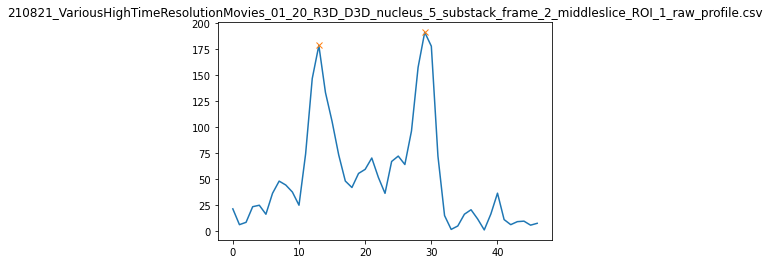

Number of Peaks: 2
[15 31]
NEs: [15 31]
Peak Dist.: 16
Nuc Mid:  23
NucStart:  19 NucEnd:  27
NucInt Point:  73.698
NucInt padded:  62


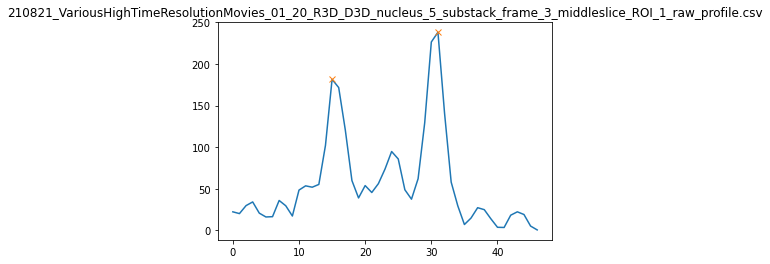

Number of Peaks: 2
[10 34]
NEs: [10 34]
Peak Dist.: 24
Nuc Mid:  22
NucStart:  16 NucEnd:  28
NucInt Point:  39.184
NucInt padded:  49


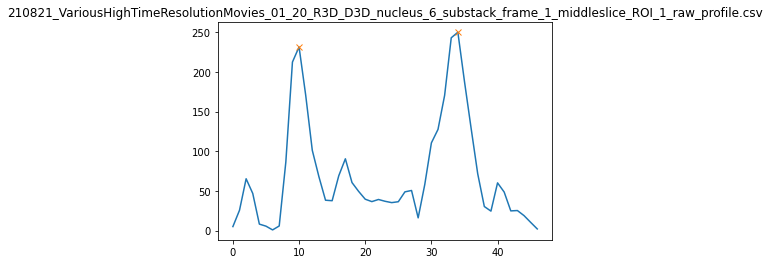

Number of Peaks: 2
[14 30]
NEs: [14 30]
Peak Dist.: 16
Nuc Mid:  22
NucStart:  18 NucEnd:  26
NucInt Point:  78.462
NucInt padded:  93


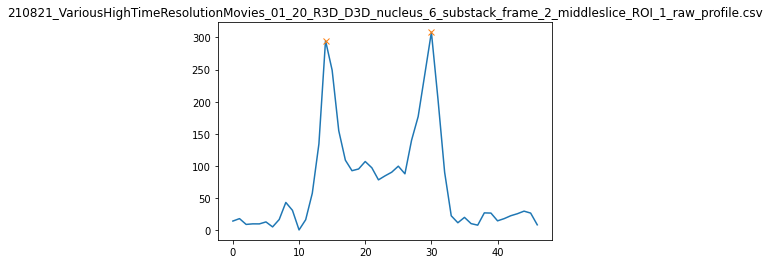

Number of Peaks: 2
[11 30]
NEs: [11 30]
Peak Dist.: 19
Nuc Mid:  20
NucStart:  15 NucEnd:  26
NucInt Point:  69.073
NucInt padded:  53


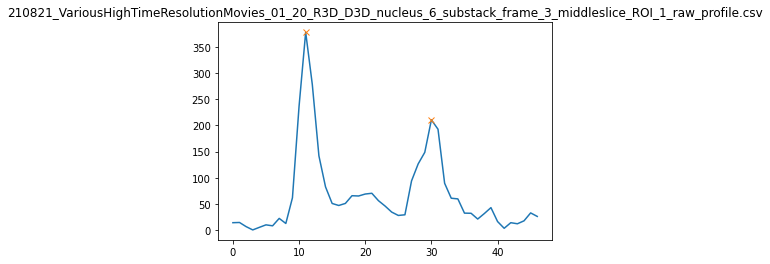

Number of Peaks: 2
[12 34]
NEs: [12 34]
Peak Dist.: 22
Nuc Mid:  23
NucStart:  17 NucEnd:  29
NucInt Point:  52.199
NucInt padded:  56


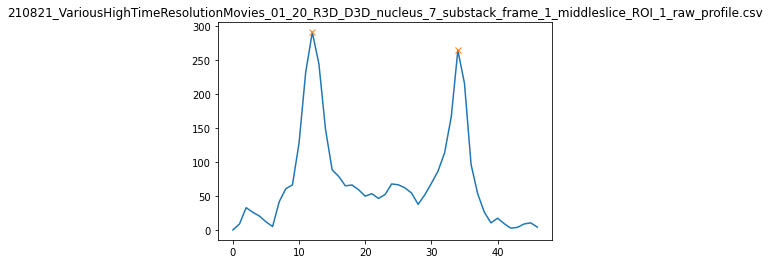

Number of Peaks: 2
[15 34]
NEs: [15 34]
Peak Dist.: 19
Nuc Mid:  24
NucStart:  19 NucEnd:  30
NucInt Point:  55.178
NucInt padded:  74


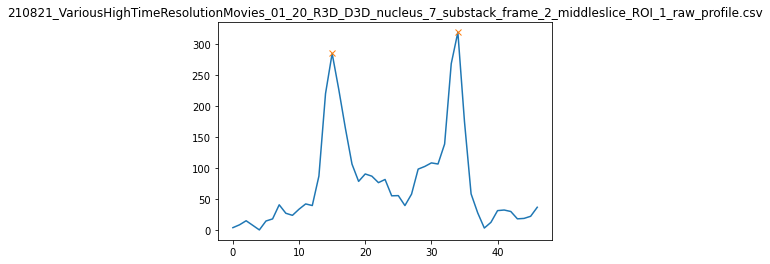

Number of Peaks: 2
[14 32]
NEs: [14 32]
Peak Dist.: 18
Nuc Mid:  23
NucStart:  18 NucEnd:  28
NucInt Point:  56.853
NucInt padded:  53


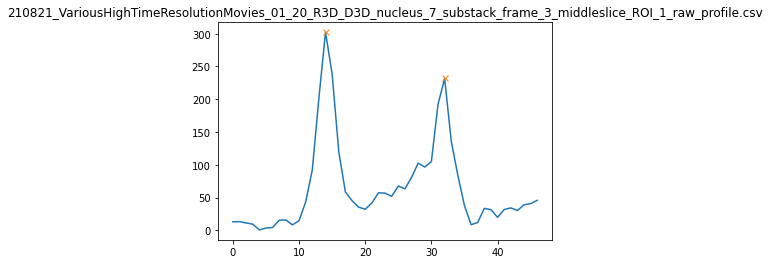

In [6]:
name_list=[]
ne1_list=[]
ne2_list=[]
nuc_list=[]
ratio_list=[]

for f in data:
    name,ne1int,ne2int,nuc,nucRatio = NucRatio(f)
    name_list.append(name)
    ne1_list.append(ne1int)
    ne2_list.append(ne2int)
    nuc_list.append(nuc)
    ratio_list.append(nucRatio)

df = pd.DataFrame({'Image': name_list, 'NE1_int': ne1_list,'NE2_int': ne2_list,'Nuc_int': nuc_list, 'Nuc_Ratio': ratio_list })
df = df[["Image", "NE1_int", "NE2_int", "Nuc_int", "Nuc_Ratio"]]
df.to_csv('NucRatios.csv')

If you are running this notebook in a Google Chrome browser, then the following code will automatically download the output as a CSV to your local computer. This only works within Chrome, so if you aren't using Chrome, you can manually download the output file by clicking the folder icon on the left side of the window. This will open the "Files" browser, and you should see all of the CSV files you uploaded, as well as the "NucRatios.csv" output file. Right click on the ouput file to bring up the options and download to your local computer.

In [7]:
files.download('NucRatios.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

To see a plot of the ratio values calculated we can plot a histogram of the results.

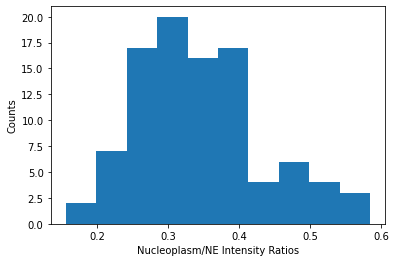

In [ ]:
%matplotlib inline

ratios = df.Nuc_Ratio

plt.hist(ratios, density=False, bins=10)
plt.ylabel("Counts") 
plt.xlabel('Nucleoplasm/NE Intensity Ratios');

If you want to reuse this notebook for another data set, strain, experiment etc. then you can click on "Runtime" at the top of the page and click "Factory Reset Runtime". This will keep the Python code notebook but will remove all of the uploaded files and the generated output file. You can then repeat the analysis, this time uploading the new set of CSVs for the next analysis.
